In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import networkx as nx

In [3]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
(188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

tab20 = [tuple([float(c)/255.0 for c in t]) for t in tableau20]

In [4]:
pruning='0.3'

In [329]:
bud_df = pd.read_csv('/Users/joelforster/Projects/optidb/sep-multi2/opti-bud.csv',names=['e','n','bud_number','size','bud_percentage','mean_budtime'])
net_df = pd.read_csv('/Users/joelforster/Projects/optidb/sep-multi2/opti-net'+pruning+'.csv',header=0)


In [334]:
len(net_df.columns.values.tolist())

21

In [335]:
cols = [x for i,x in enumerate(net_df.columns.values.tolist()) if i!=2 and i<18]

In [336]:
net_df = net_df.drop_duplicates(cols)

In [337]:
for c in bud_df.columns:
    bud_df[c] = bud_df[c].astype(float)
for c in net_df.columns:
    net_df[c] = net_df[c].astype(float)

In [338]:
# net_df.head(5)

In [339]:
criticalRegion = bud_df.query('bud_percentage > 0.15 & bud_percentage < 0.85 & e*n < 320')[['e','n']].values.tolist()
criticalNets = pd.DataFrame(columns=net_df.columns)
for c in criticalRegion:
    runNets = net_df[(net_df['Mean Affinity']==c[1]) & (net_df['Ligand Number']==c[0])]
    criticalNets = criticalNets.append(runNets)

In [340]:
print criticalRegion

[[20.0, 12.0], [20.0, 13.0], [20.0, 14.0], [21.0, 12.0], [21.0, 13.0], [21.0, 14.0], [22.0, 11.0], [22.0, 12.0], [22.0, 13.0], [22.0, 14.0], [23.0, 10.0], [23.0, 11.0], [23.0, 12.0], [23.0, 13.0], [24.0, 10.0], [24.0, 11.0], [24.0, 12.0], [24.0, 13.0], [25.0, 9.0], [25.0, 10.0], [25.0, 11.0], [25.0, 12.0], [26.0, 9.0], [26.0, 10.0], [26.0, 11.0], [26.0, 12.0], [27.0, 9.0], [27.0, 10.0], [27.0, 11.0], [28.0, 8.0], [28.0, 9.0], [28.0, 10.0], [28.0, 11.0], [29.0, 8.0], [29.0, 9.0], [29.0, 10.0], [30.0, 8.0], [30.0, 9.0], [31.0, 7.0], [31.0, 8.0], [31.0, 9.0], [32.0, 7.0], [32.0, 8.0], [33.0, 7.0], [33.0, 8.0], [34.0, 7.0], [34.0, 8.0], [35.0, 6.0], [35.0, 7.0], [36.0, 6.0], [36.0, 7.0], [37.0, 6.0], [37.0, 7.0], [38.0, 6.0], [39.0, 6.0], [40.0, 5.0], [40.0, 6.0], [41.0, 5.0], [42.0, 5.0], [43.0, 5.0], [44.0, 5.0], [45.0, 5.0], [46.0, 5.0], [49.0, 4.0], [50.0, 4.0], [51.0, 4.0], [52.0, 4.0], [53.0, 4.0], [54.0, 4.0], [55.0, 4.0]]


In [342]:
net_df = criticalNets

In [343]:
budNets = criticalNets[criticalNets['Mean Budding Time'] > 0.0].groupby(['Mean Affinity','Ligand Number']).mean().reset_index()
nonbudNets = criticalNets[criticalNets['Mean Budding Time'] < 0.0].groupby(['Mean Affinity','Ligand Number']).mean().reset_index()

In [344]:
meanBudNets = criticalNets[criticalNets['Mean Budding Time'] > 0.0].groupby(['Ligand Number']).mean().reset_index()
meanNonbudNets = criticalNets[criticalNets['Mean Budding Time'] < 0.0].groupby(['Ligand Number']).mean().reset_index()

249.5142857142857 196.0 312.0 31.013242727741254


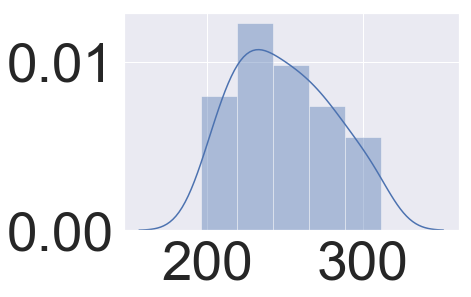

In [345]:
criticalEnergy = map(lambda x: x[0]*x[1],criticalRegion)
ax = sns.distplot(criticalEnergy)
print np.mean(criticalEnergy) , np.min(criticalEnergy), np.max(criticalEnergy),np.std(criticalEnergy)


Text(0.5,1,'Boundary Region Total Ligand Binding Energy')

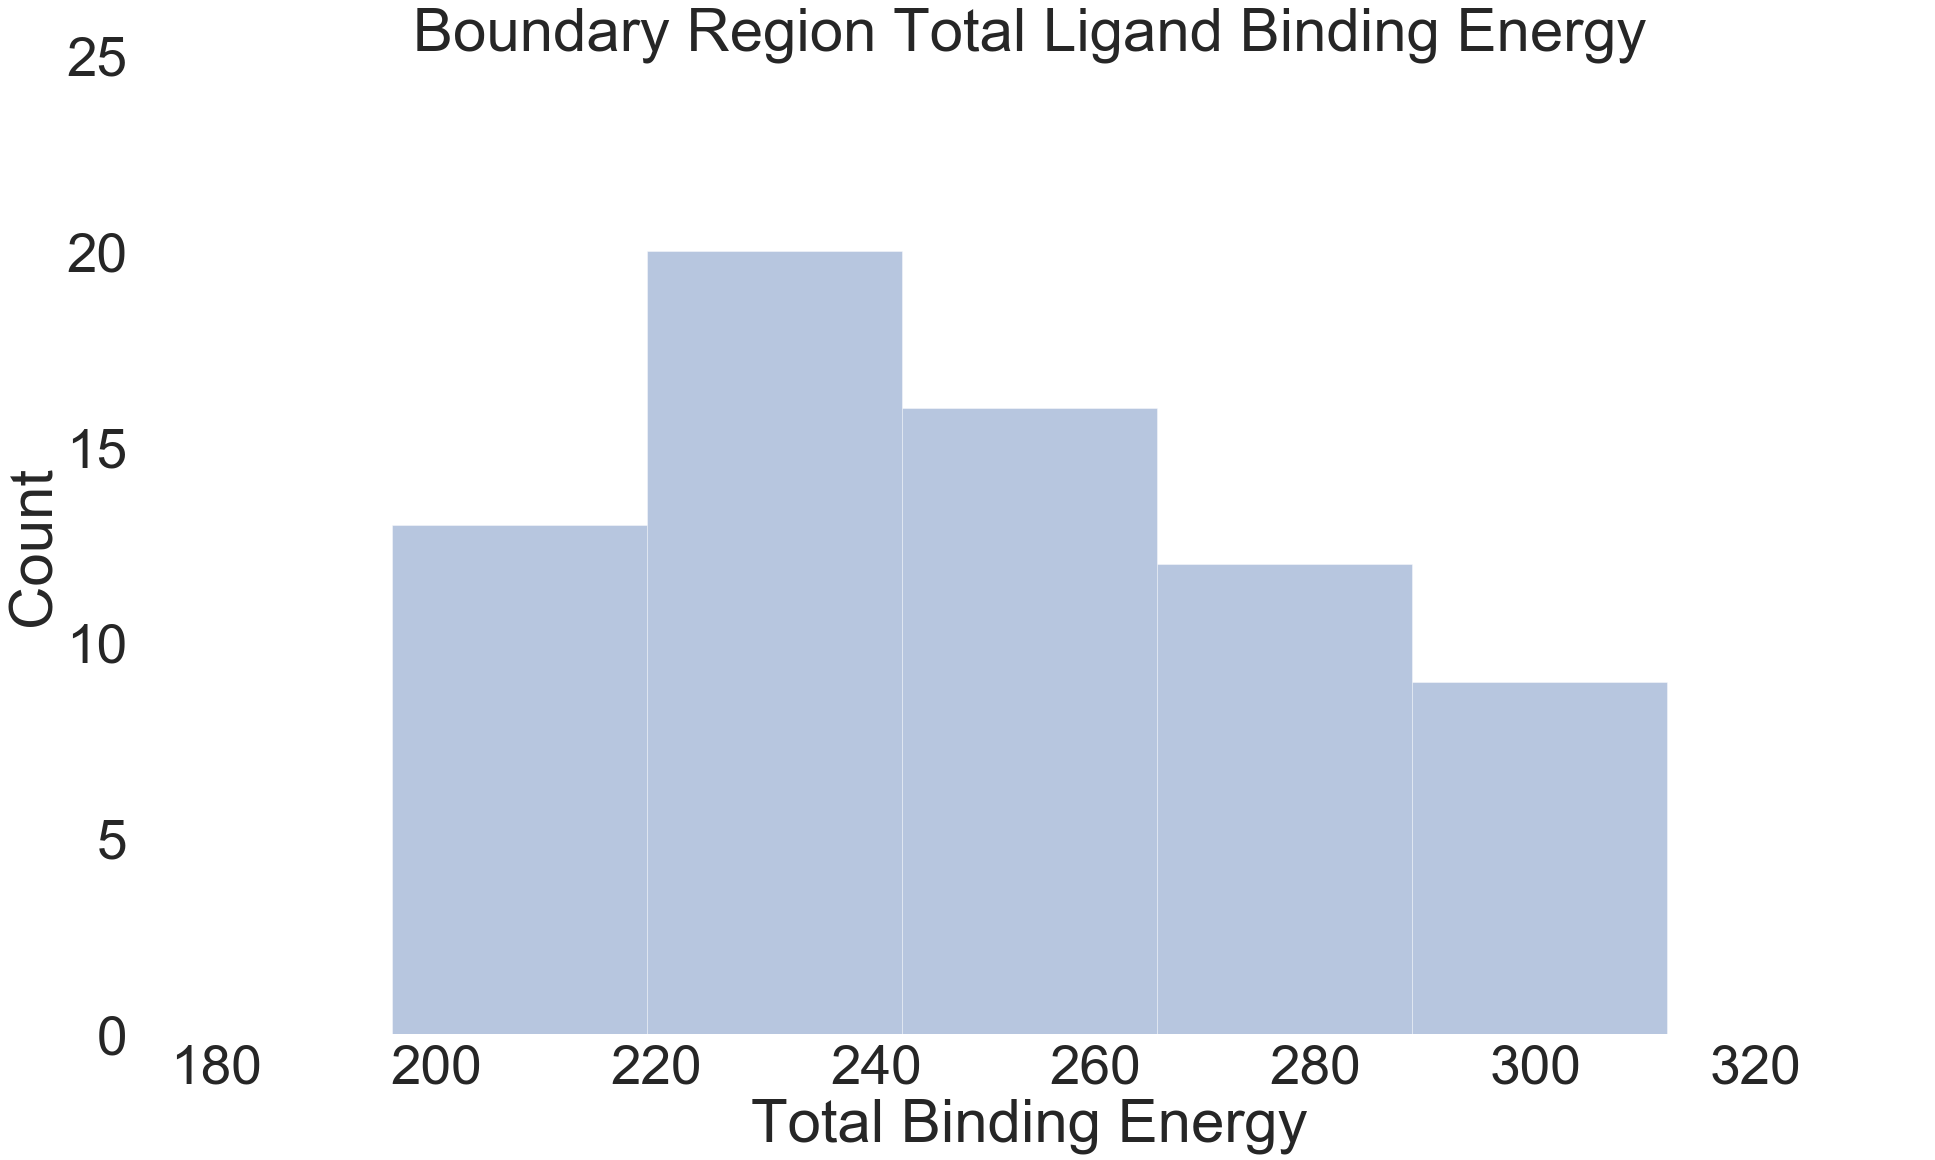

In [346]:
plt.figure(figsize=(16*2,9*2))
criticalEnergy = map(lambda x: x[0]*x[1],criticalRegion)
sns.set_style("white")
ax = sns.distplot(criticalEnergy,kde=False)
ax.set_xlabel("Total Binding Energy")
ax.set_ylabel("Count")
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
plt.margins(0.2, 0.25)
ax.set_title("Boundary Region Total Ligand Binding Energy")

In [347]:
bins = np.linspace(0, 100, 40)

digitisedLigandNum = np.digitize(budNets["Ligand Number"], bins)
binnedLigandNum = [budNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedNonBudLigandNum = [nonbudNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedBuddingRate = [budNets["Budding Rate"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]

binnedLigandNum = [b for b in binnedLigandNum if not np.isnan(b)]
binnedNonBudLigandNum = [b for b in binnedNonBudLigandNum if not np.isnan(b)]
binnedBuddingRate = [b for b in binnedBuddingRate if not np.isnan(b)]

print(binnedLigandNum)


binLists = []
nonbinLists = []
for b in range(1, len(bins)):
    binLists.append(list(budNets["Ligand Number"].values[[digitisedLigandNum == b]]))
    nonbinLists.append(list(nonbudNets["Ligand Number"].values[[digitisedLigandNum == b]]))

[20.0, 22.09090909090909, 24.5, 27.0, 29.4, 31.857142857142858, 34.5, 36.8, 40.0, 42.5, 45.0, 50.0, 52.5, 54.5]


/Users/joelforster/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/joelforster/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [348]:
def buildBinnedPlot(c,err=stats.sem):
    
    
    binnedBudC = [b for b in [np.mean(net_df[(net_df["Ligand Number"].isin(b)) & (net_df['Mean Budding Time'] > 0.0)][c]) for b in binLists] if not np.isnan(b)]
#     binnedBudyErr = [b for b in [np.std(budNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    binnedBudyErr = [b for b in [err(net_df[(net_df["Ligand Number"].isin(b)) & (net_df['Mean Budding Time'] > 0.0)][c]) for b in binLists] if not np.isnan(b)]
    
    binnedBudxErr = [b for b in [err(net_df[(net_df["Ligand Number"].isin(b)) & (net_df['Mean Budding Time'] > 0.0)]["Ligand Number"]) for b in binLists] if not np.isnan(b)]
    binnedBudxErr = [b if b > 0.0 else 0.0 for b in binnedBudxErr]
    binnedBudC = [b for b in binnedBudC if not np.isnan(b)]
    binnedNoBudC = [b for b in [np.mean(net_df[(net_df["Ligand Number"].isin(b)) & (net_df['Mean Budding Time'] < 0.0)][c]) for b in binLists] if not np.isnan(b)]
    binnedNoBudC = [b for b in binnedNoBudC if not np.isnan(b)]
#     binnedNoBudyErr = [b for b in [np.std(nonbudNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    binnedNoBudyErr = [b for b in [err(net_df[(net_df["Ligand Number"].isin(b)) & (net_df['Mean Budding Time'] < 0.0)][c]) for b in binLists] if not np.isnan(b)]
    
    binnedNoBudxErr = [b for b in [err(net_df[(net_df["Ligand Number"].isin(b)) & (net_df['Mean Budding Time'] < 0.0)]["Ligand Number"]) for b in binLists]if not np.isnan(b)]
    binnedNoBudxErr = [b if b > 0.0 else 0.0 for b in binnedNoBudxErr]
    return binnedBudC,binnedBudxErr,binnedBudyErr,binnedNoBudC,binnedNoBudxErr,binnedNoBudyErr

In [349]:
def buildHistPlot(c,n):
    budPop = criticalNets[(criticalNets['Mean Budding Time'] > 0.0)&(criticalNets['Ligand Number']==float(n))][c].values.tolist()
    nonBudPop = criticalNets[(criticalNets['Mean Budding Time'] < 0.0)&(criticalNets['Ligand Number']==float(n))][c].values.tolist()
    return budPop, nonBudPop
    

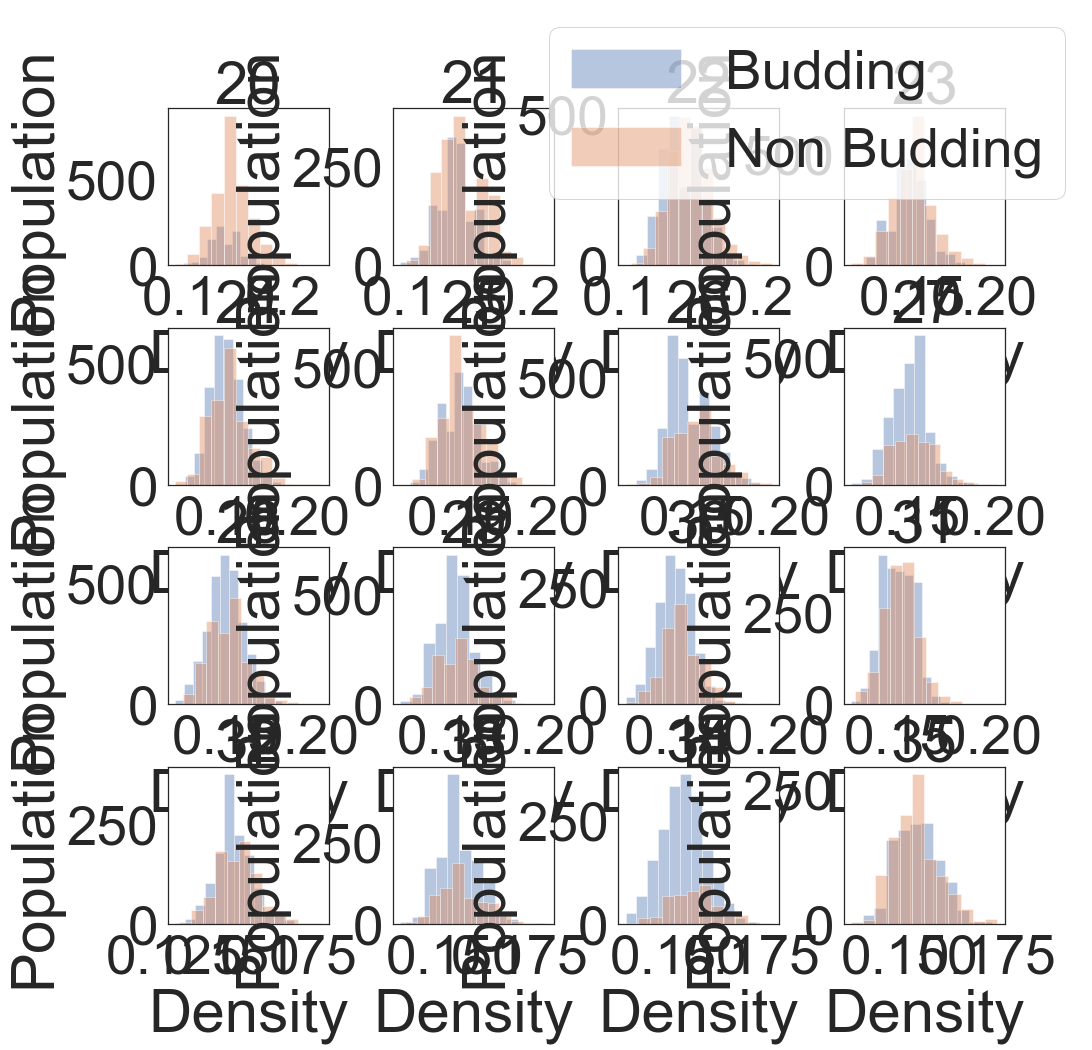

In [350]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
startI = 20
for i in range(startI,startI+16):
    ax = plt.subplot(4, 4, i-startI+1)
    r = buildHistPlot("Density",i)
    ax = sns.distplot(r[0],label="Budding",bins=12,kde=False)
    ax = sns.distplot(r[1],label="Non Budding",bins=12,kde=False)
    ax.set_xlabel("Density")
    ax.set_ylabel("Population")
    ax.set_title(i)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

In [351]:
labelSize=32
tickSize=32

In [352]:
def bigFig(c,filled=True,label="NONE",suffix="",prefix="",markersize=10,factor=2.0):
    padding=0.025
    sns.set_style("white")
    if label=="NONE":
        label = c
    plt.figure(figsize=(16.0*factor,9*factor))
    ax = plt.subplot(111)

    r = [int(np.floor(min(budNets[c])*1000)), int(np.ceil(max(budNets[c])*1000)+1)]
    # for y in range(r[0],r[1]):    
    #     plt.plot(range(r[0],r[1]), [y] * len(range(r[0],r[1])), "--", lw=0.5, color="black", alpha=0.3)

    xr = range(int(np.floor(min(budNets['Ligand Number']))-1), int(np.ceil(max(budNets['Ligand Number']))+2))

    # for y in range(r[0],r[1]):    
    #     plt.plot(xr, [y*0.001] * len(xr) , "--", lw=0.5, color="black", alpha=0.3)    


    r = buildBinnedPlot(c)

#     plt.errorbar(binnedLigandNum,r[0],xerr=r[1],yerr=r[2],fmt='o',label="Budding")
#     plt.errorbar(binnedNonBudLigandNum,r[3],yerr=r[5],xerr=r[4],fmt='o',label="Non Budding")
    if filled:
        plt.errorbar(binnedLigandNum,r[0],fmt='-o',label="Budding", markersize=markersize)
    else:
        ax.errorbar(binnedLigandNum,r[0],xerr=r[1],yerr=r[2],fmt='o',label="Budding",capsize=8*factor, markersize=markersize,elinewidth=3*factor,markeredgewidth=3*factor)

    
    if np.mean(r[3]) > 0.1:
        if filled:
            plt.errorbar(binnedNonBudLigandNum,r[3],fmt='-o',label="Non Budding", markersize=markersize)
        else:
            ax.errorbar(binnedNonBudLigandNum,r[3],yerr=r[5],xerr=r[4],fmt='o',label="Non Budding",markersize=markersize,capsize=8*factor, elinewidth=3*factor,markeredgewidth=3*factor)
    
    if filled:
        yerrbud1 = [e[0]-e[1] for e in  zip(r[0],r[2])]
        yerrbud2 = [e[0]+e[1] for e in  zip(r[0],r[2])]

        yerrnobud1 = [e[0]-e[1] for e in  zip(r[3],r[5])]
        yerrnobud2 = [e[0]+e[1] for e in  zip(r[3],r[5])]

        ax.fill_between(binnedLigandNum,yerrbud1, yerrbud2, where=yerrbud2 >= yerrbud1, facecolor=tab20[1], interpolate=True,alpha=0.5)
        if np.mean(r[3]) > 0.1:
            ax.fill_between(binnedLigandNum,yerrnobud1, yerrnobud2, where=yerrnobud2 >= yerrnobud1, facecolor=tab20[3], interpolate=True,alpha=0.5)

    yr0 = np.min([r[1],r[2],r[4],r[5]])*(1.0-padding)
    yr1 = np.max([r[1],r[2],r[4],r[5]])*(1.0+padding)
        
    plt.ylabel(label,fontsize=labelSize*factor*1.15,labelpad=25*factor)
    plt.xlabel("Ligand Number",fontsize=labelSize*factor*1.15,labelpad=25*factor)
    
    plt.xticks(fontsize=tickSize*factor)
    plt.yticks(fontsize=tickSize*factor)
    ax.spines["top"].set_visible(True)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(True)    
    ax.spines["left"].set_visible(True) 
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()   
    
#     ax.set_ylim(yr0,yr1)
    plt.tick_params(axis="both", which="both", bottom="on", top="on",    
                    labelbottom="on", left="on", right="on", labelleft="on",direction='in')  

    plt.gca().tick_params(axis='x', which='major', pad=25)
    plt.gca().tick_params(axis='y', which='major', pad=25)

    
#     plt.gca().grid(True)
    plt.legend(loc='best',fontsize=labelSize*factor*1.15)
    plt.tight_layout()
    plt.savefig('/Users/joelforster/Projects/Figures/eps/'+prefix+'-'+label.replace(' ','-')+'-LigandNumber'+suffix+'.eps', format='eps', dpi=1000)
    plt.savefig('/Users/joelforster/Projects/Figures/png/'+prefix+'-'+label.replace(' ','-')+'-LigandNumber'+suffix+'.png')
    plt.savefig('/Users/joelforster/Projects/Figures/svg/'+prefix+'-'+label.replace(' ','-')+'-LigandNumber'+suffix+'.svg', format='svg')
    plt.cla()
    plt.clf()

In [353]:
for c in budNets.columns:
    bigFig(c,prefix="larger",filled=True,markersize=22)


<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

<Figure size 2304x1296 with 0 Axes>

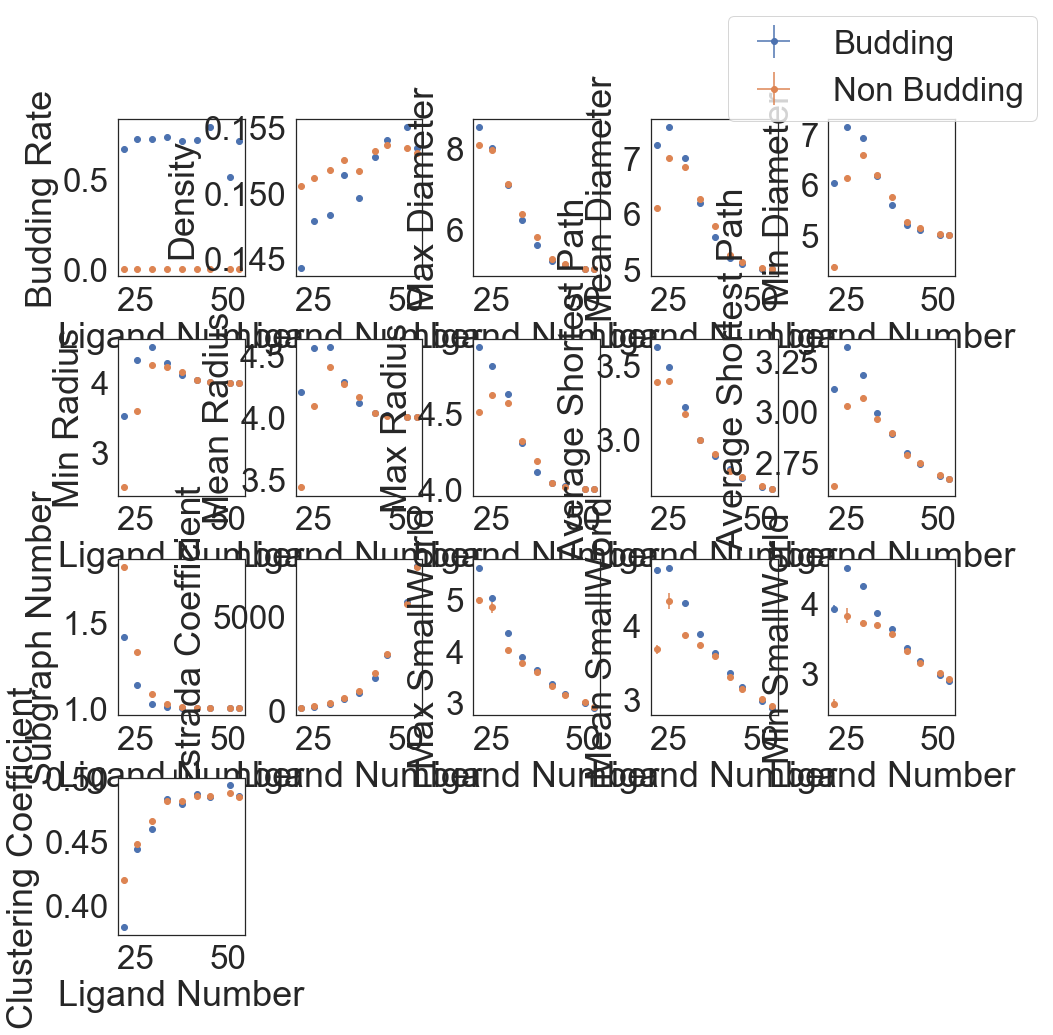

In [312]:
i = 1


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path","Mean Budding Time"]:
        continue
    ax = plt.subplot(4, 5, i)
#     binnedBudC = [budNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
#     binnedBudyErr = [b for b in [np.std(budNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
#     binnedBudxErr = [b for b in [np.std(budNets["Ligand Number"][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
#     binnedBudC = [b for b in binnedBudC if not np.isnan(b)]
#     binnedNoBudC = [nonbudNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
#     binnedNoBudC = [b for b in binnedNoBudC if not np.isnan(b)]
#     binnedNoBudyErr = [b for b in [np.std(nonbudNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
#     binnedNoBudxErr = [b for b in [np.std(nonbudNets["Ligand Number"][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    r = buildBinnedPlot(c)

    ax.errorbar(binnedLigandNum,r[0],xerr=r[1],yerr=r[2],fmt='o',label="Budding")
    ax.errorbar(binnedNonBudLigandNum,r[3],yerr=r[5],xerr=r[4],fmt='o',label="Non Budding")
    #ax.plot(binnedLigandNum,binnedBudC,'.',label="Budding")
    plt.ylabel(c)
    plt.xlabel("Ligand Number")
    
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

In [146]:
budNets.columns

Index([u'Mean Affinity', u'Ligand Number', u'Fitness', u'Mean Budding Time',
       u'Budding Rate', u'Density', u'Max Diameter', u'Mean Diameter',
       u'Min Diameter', u'Min Radius', u'Mean Radius', u'Max Radius',
       u'Max Average Shortest Path', u'Mean Average Shortest Path',
       u'Min Average Shortest Path', u'Subgraph Number',
       u'Estrada Coefficient', u'Pruning', u'Max SmallWorld',
       u'Mean SmallWorld', u'Min SmallWorld', u'Clustering Coefficient'],
      dtype='object')

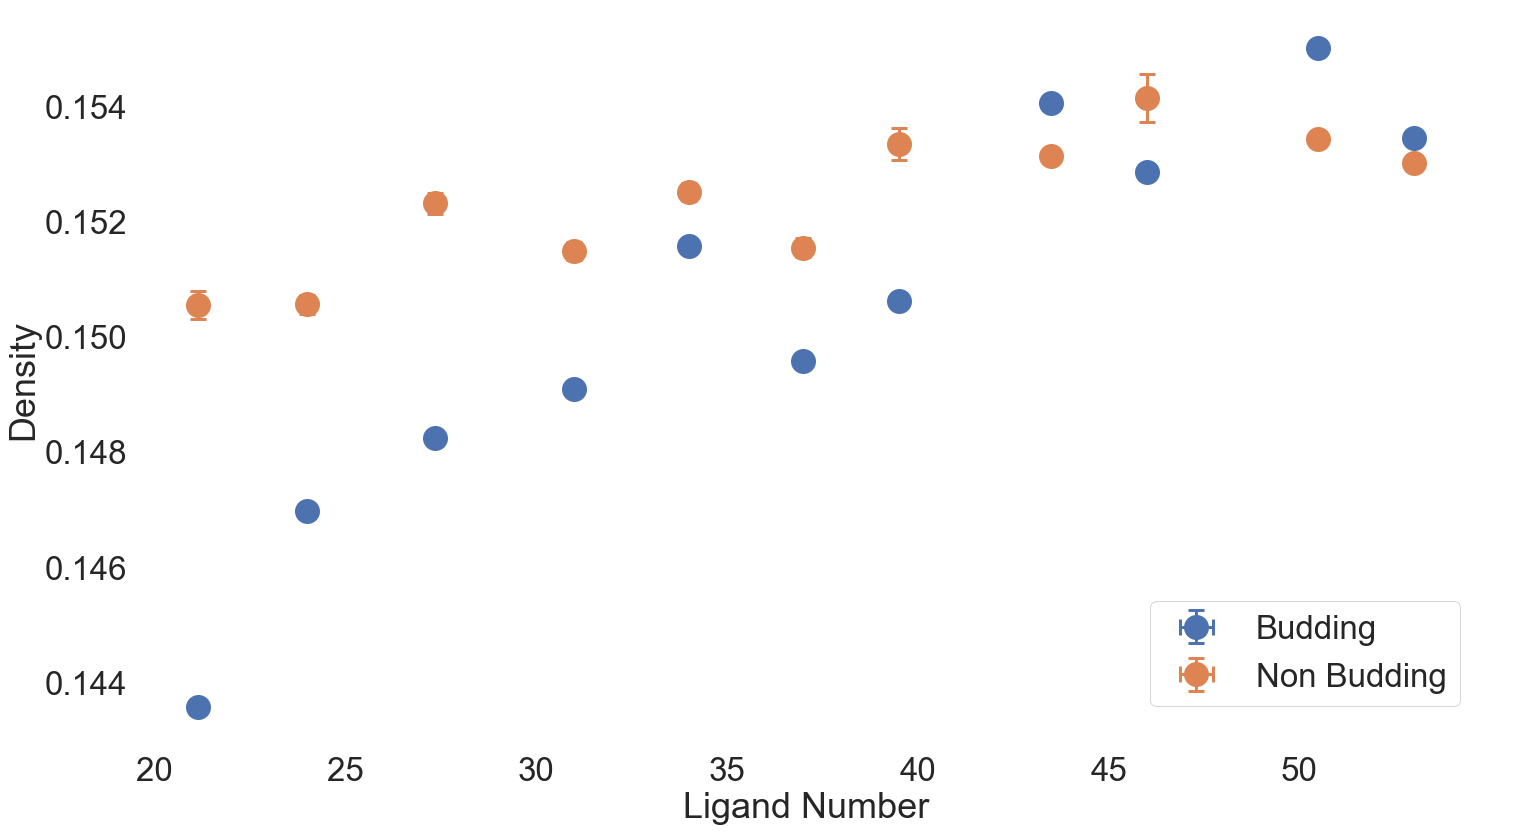

In [328]:
c="Density"
fig = plt.figure(figsize=(16*1.5,9*1.5))
r = buildBinnedPlot(c)
ax = plt.gca()
ax.errorbar(binnedLigandNum,r[0],xerr=r[1],yerr=r[2],fmt='o',label="Budding",capsize=8, markersize=22,
    elinewidth=3,
    markeredgewidth=3)
ax.errorbar(binnedNonBudLigandNum,r[3],yerr=r[5],xerr=r[4],fmt='o',label="Non Budding",markersize=22,capsize=8, 
    elinewidth=3,
    markeredgewidth=3)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

plt.ylabel(c)
plt.xlabel("Ligand Number")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.75,0.15))
plt.show()

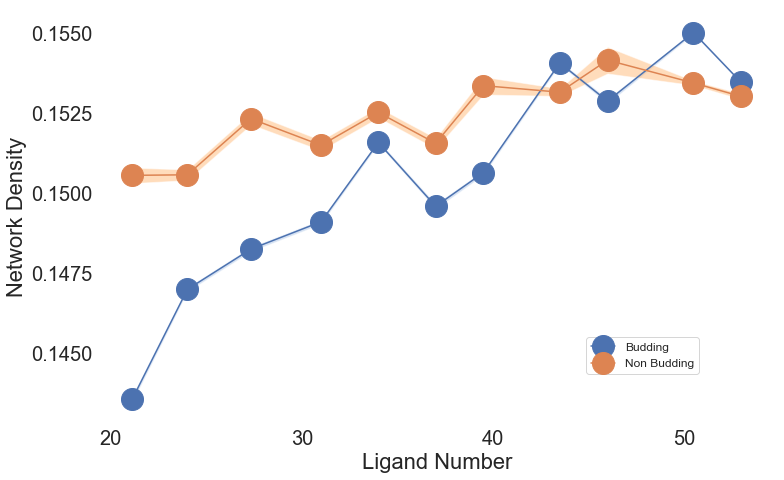

In [329]:
plt.figure(figsize=(12,7.5))
ax = plt.subplot(111)

r = [int(np.floor(min(budNets['Density'])*1000)), int(np.ceil(max(budNets['Density'])*1000)+1)]
# for y in range(r[0],r[1]):    
#     plt.plot(range(r[0],r[1]), [y] * len(range(r[0],r[1])), "--", lw=0.5, color="black", alpha=0.3)

xr = range(int(np.floor(min(budNets['Ligand Number']))-1), int(np.ceil(max(budNets['Ligand Number']))+1))

# for y in range(r[0],r[1]):    
#     plt.plot(xr, [y*0.001] * len(xr) , "--", lw=0.5, color="black", alpha=0.3)    
 
    
r = buildBinnedPlot("Density",err=stats.sem)

plt.errorbar(binnedLigandNum,r[0],fmt='-o',label="Budding",markersize=22)
plt.errorbar(binnedNonBudLigandNum,r[3],fmt='-o',label="Non Budding",markersize=22)

yerrbud1 = [e[0]-e[1] for e in  zip(r[0],r[2])]
yerrbud2 = [e[0]+e[1] for e in  zip(r[0],r[2])]

yerrnobud1 = [e[0]-e[1] for e in  zip(r[3],r[5])]
yerrnobud2 = [e[0]+e[1] for e in  zip(r[3],r[5])]

ax.fill_between(binnedLigandNum,yerrbud1, yerrbud2, where=yerrbud2 >= yerrbud1, facecolor=tab20[1], interpolate=True,alpha=0.5)
ax.fill_between(binnedLigandNum,yerrnobud1, yerrnobud2, where=yerrnobud2 >= yerrnobud1, facecolor=tab20[3], interpolate=True,alpha=0.5)

    
# plt.plot(budNets["Ligand Number"],budNets['Density'],'.',label='_nolegend_',alpha=0.5,color=plt.get_cmap('tab20')(3))
# plt.plot(nonbudNets["Ligand Number"],nonbudNets['Density'],'.',label='_nolegend_',alpha=0.5,color=plt.get_cmap('tab20')(1))
# plt.plot(meanBudNets["Ligand Number"],meanBudNets['Density'],'s',label="Budding",color=plt.get_cmap('tab20')(2))
# plt.plot(meanNonbudNets["Ligand Number"],meanNonbudNets['Density'],'s',label="Non Budding",alpha=0.5,color=plt.get_cmap('tab20')(0))
plt.ylabel("Network Density",fontsize=labelSize)
plt.xlabel("Ligand Number",fontsize=labelSize)
plt.xticks(fontsize=tickSize)
plt.yticks(fontsize=tickSize)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  
plt.legend(loc='lower right',fontsize=12,bbox_to_anchor=(0.9, 0.1))
plt.savefig('/Users/joelforster/Projects/Figures/Density-LigandNumber2.eps', format='eps', dpi=1000)
plt.savefig('/Users/joelforster/Projects/Figures/Density-LigandNumber2.png')
plt.show()

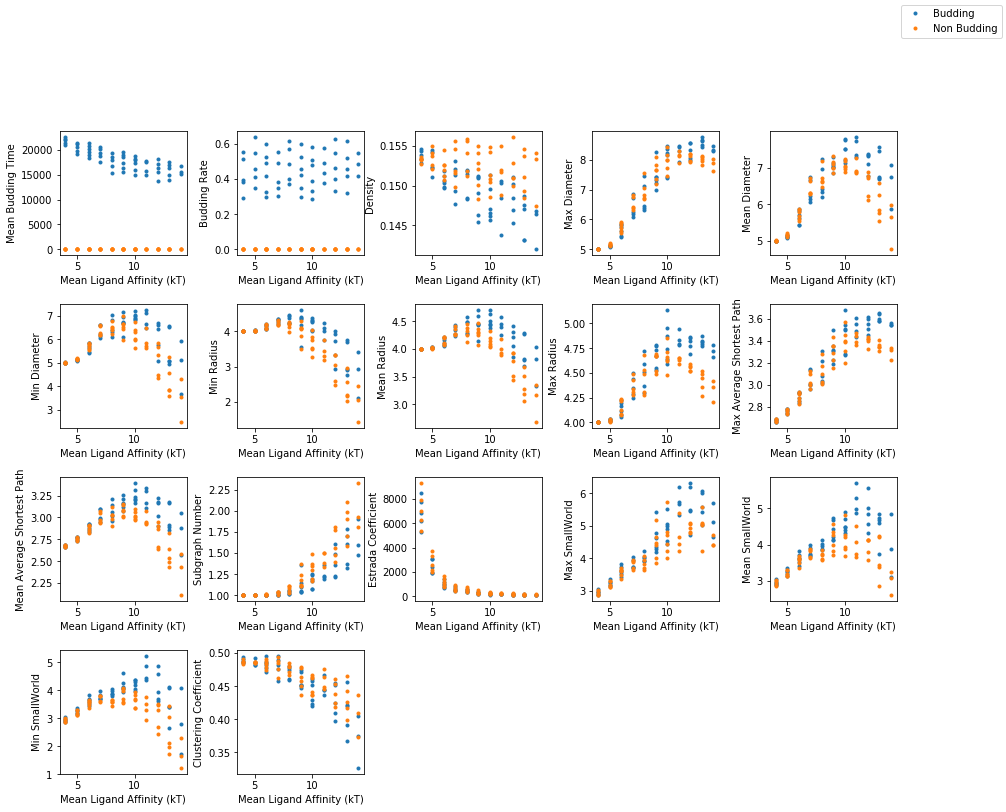

In [46]:
i = 1


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(5, 5, i)
    ax.plot(budNets['Mean Affinity'],budNets[c],'.',label="Budding")
    ax.plot(nonbudNets['Mean Affinity'],nonbudNets[c],'.',label="Non Budding")
    plt.ylabel(c)
    plt.xlabel("Mean Ligand Affinity (kT)")
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

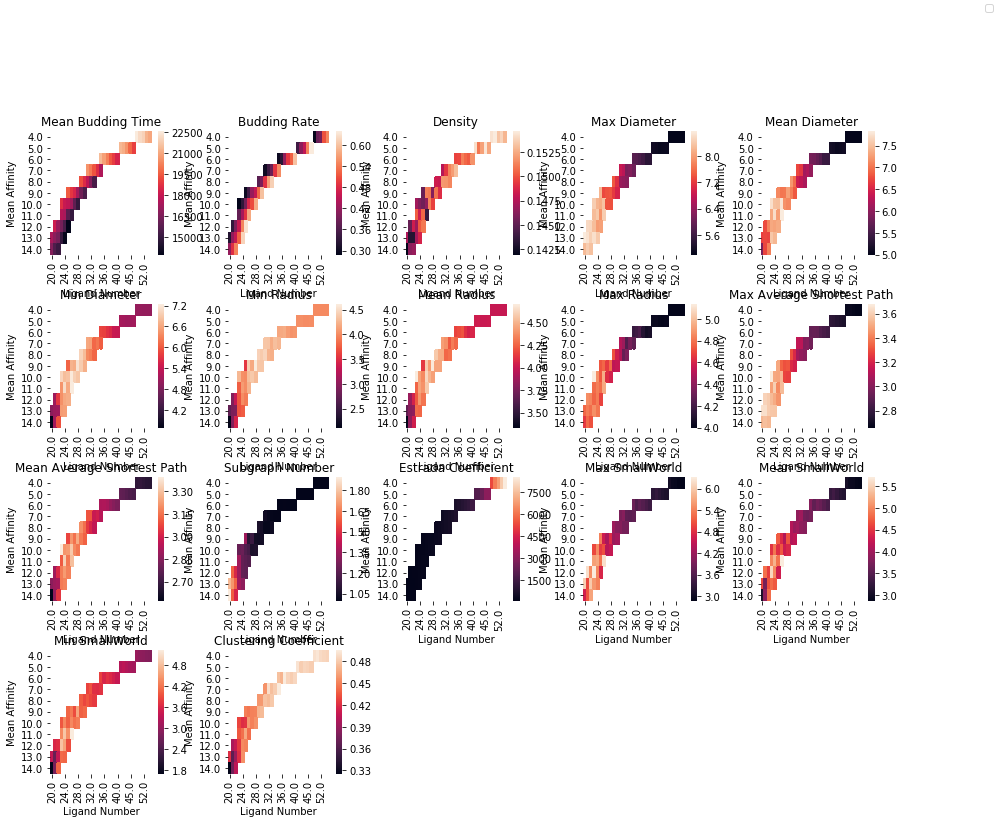

In [47]:
i = 1
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(5, 5, i)
    budNetsT = budNets.pivot("Mean Affinity", "Ligand Number", c)
    ax = sns.heatmap(budNetsT)
    ax.set_title(c)
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

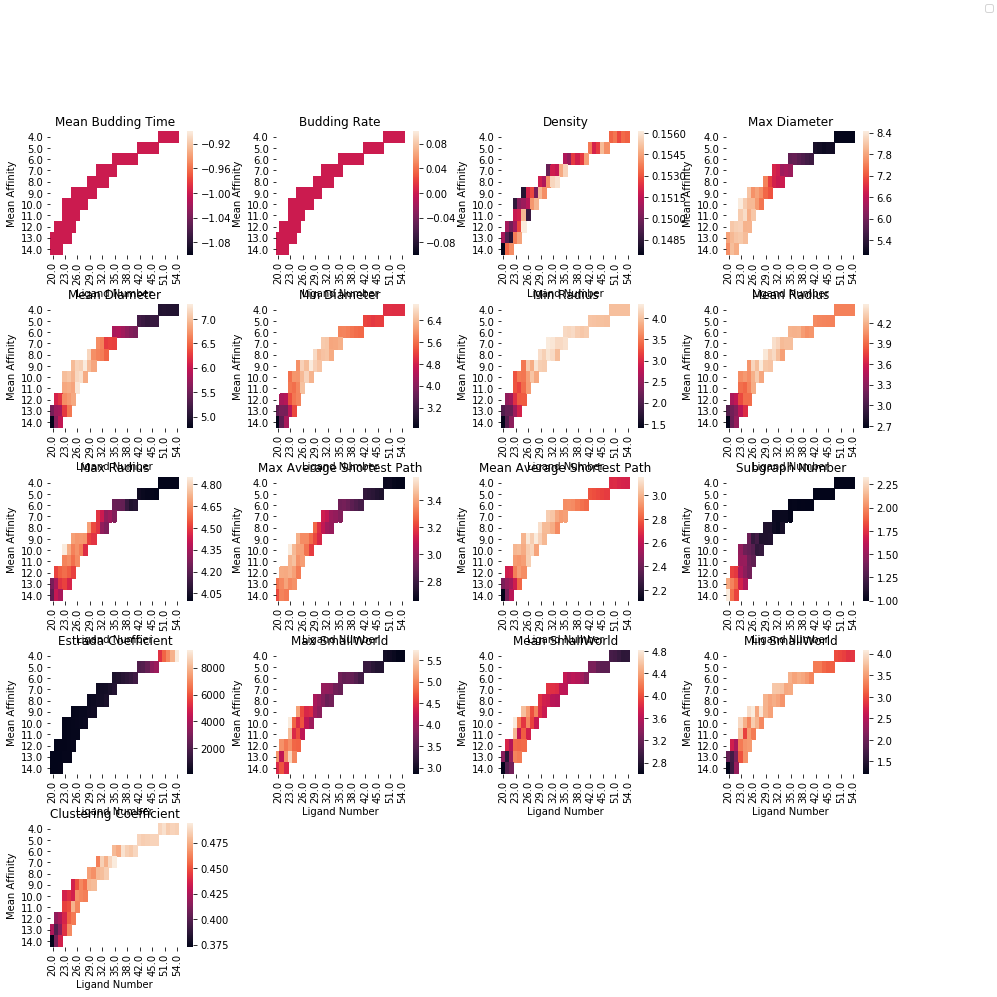

In [56]:
i = 1
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(5, 4, i)
    nonbudNetsT = nonbudNets.pivot("Mean Affinity", "Ligand Number", c)
    ax.set_title(c)
    ax = sns.heatmap(nonbudNetsT)
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

In [49]:
bins = np.linspace(0, 100, 26)
print bins

digitisedLigandNum = np.digitize(meanBudNets["Ligand Number"], bins)
binnedLigandNum = [meanBudNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedNonBudLigandNum = [meanNonbudNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedBuddingRate = [meanBudNets["Budding Rate"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]

binnedLigandNum = [b for b in binnedLigandNum if not np.isnan(b)]
binnedNonBudLigandNum = [b for b in binnedNonBudLigandNum if not np.isnan(b)]
binnedBuddingRate = [b for b in binnedBuddingRate if not np.isnan(b)]


[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100.]


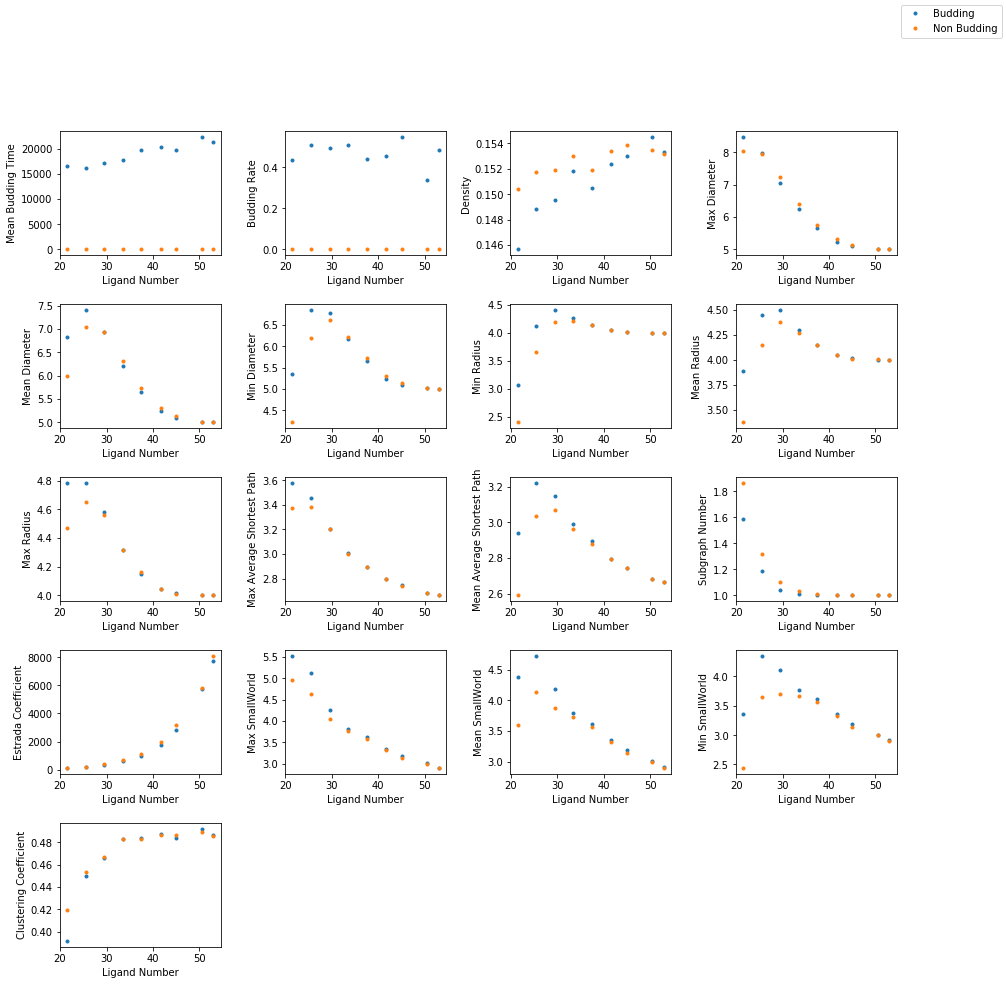

In [57]:
i = 1
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in meanBudNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(5, 4, i)
    binnedBudC = [meanBudNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
    binnedBudC = [b for b in binnedBudC if not np.isnan(b)]
    binnedNoBudC = [meanNonbudNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
    binnedNoBudC = [b for b in binnedNoBudC if not np.isnan(b)]
    ax.plot(binnedLigandNum,binnedBudC,'.',label="Budding")
    ax.plot(binnedNonBudLigandNum,binnedNoBudC,'.',label="Non Budding")
    plt.ylabel(c)
    plt.xlabel("Ligand Number")
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

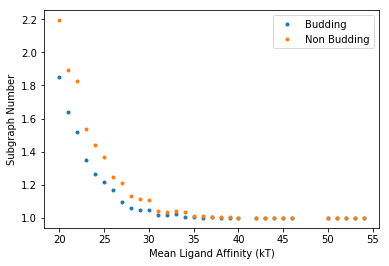

In [58]:
c = 'Subgraph Number'
plt.plot(meanBudNets['Ligand Number'],meanBudNets[c],'.',label="Budding")
plt.plot(meanNonbudNets['Ligand Number'],meanNonbudNets[c],'.',label="Non Budding")
plt.ylabel(c)
plt.xlabel("Mean Ligand Affinity (kT)")
plt.legend()
plt.show()

In [59]:
budNets = criticalNets[criticalNets['Mean Budding Time'] > 0.0].groupby(['Mean Affinity']).mean().reset_index()
nonbudNets = criticalNets[criticalNets['Mean Budding Time'] < 0.0].groupby(['Mean Affinity']).mean().reset_index()

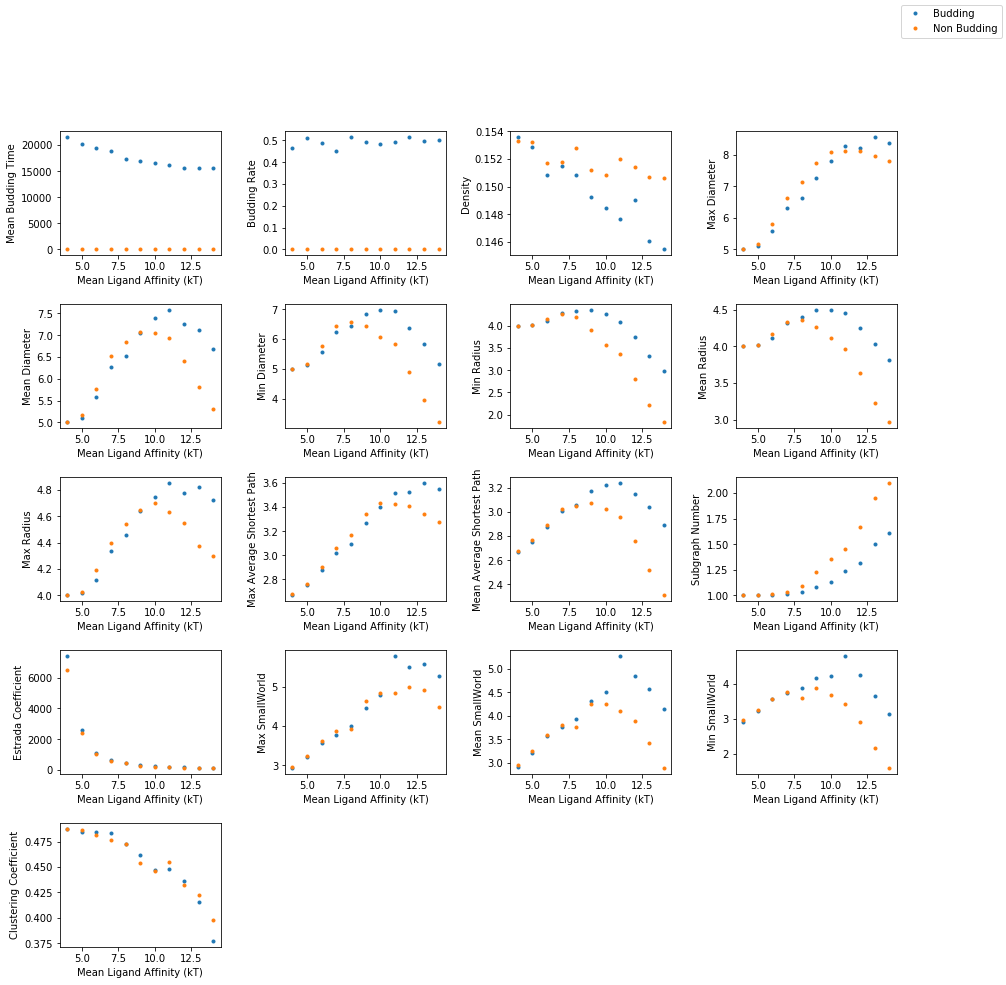

In [61]:
i = 1


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(5, 4, i)
    ax.plot(budNets['Mean Affinity'],budNets[c],'.',label="Budding")
    ax.plot(nonbudNets['Mean Affinity'],nonbudNets[c],'.',label="Non Budding")
    plt.ylabel(c)
    plt.xlabel("Mean Ligand Affinity (kT)")
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

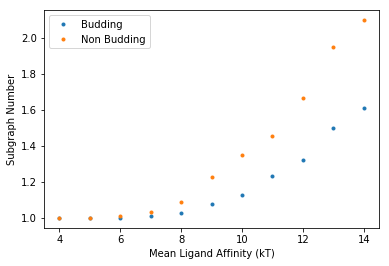

In [62]:
c = 'Subgraph Number'
plt.plot(budNets['Mean Affinity'],budNets[c],'.',label="Budding")
plt.plot(nonbudNets['Mean Affinity'],nonbudNets[c],'.',label="Non Budding")
plt.ylabel(c)
plt.xlabel("Mean Ligand Affinity (kT)")
plt.legend()
plt.show()

In [63]:
zoo_df = pd.read_csv('/Users/joel/Projects/golden/zoo.csv',names=['name','n','e','fitness','bud_rate','budtime'])

IOError: [Errno 2] File /Users/joel/Projects/golden/zoo.csv does not exist: '/Users/joel/Projects/golden/zoo.csv'

NameError: name 'zoo_df' is not defined

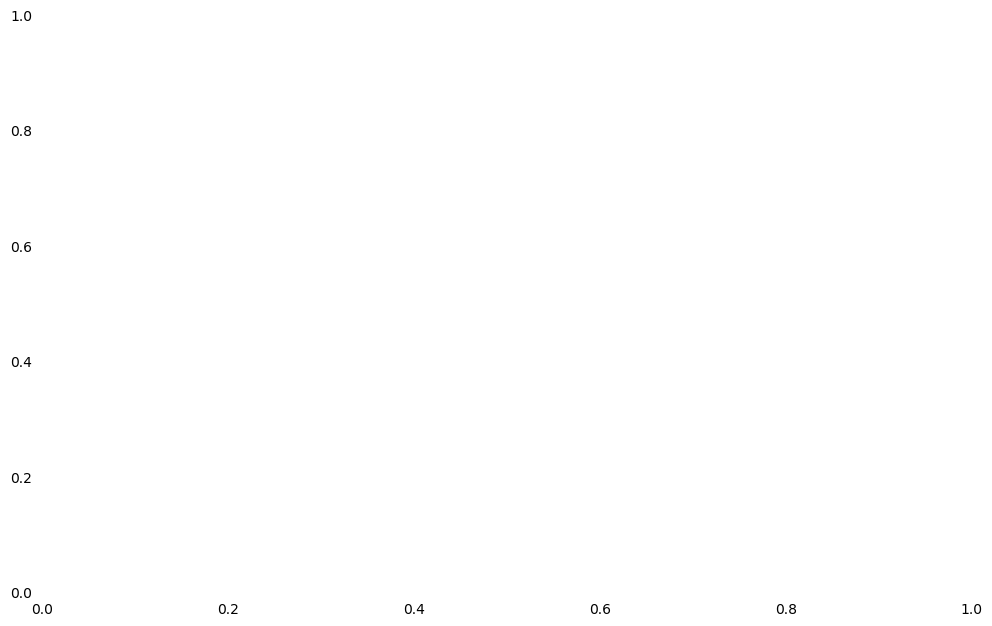

In [66]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')
plt.figure(figsize=(12,7.5))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on") 
plt.plot(zoo_df[zoo_df['budtime']>0]['n'],zoo_df[zoo_df['budtime']>0]['budtime'],'o',label="Evenly Covered")
plt.plot(budNets[budNets['Mean Budding Time']>0]['Ligand Number'],budNets[budNets['Mean Budding Time']>0]['Mean Budding Time'],'o',label="Evolved")
plt.ylabel('Budding Time',fontsize=16)
plt.xlabel("Ligand Number",fontsize=16)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
plt.ylim(0,25000)
plt.legend(fontsize=16)
plt.show()

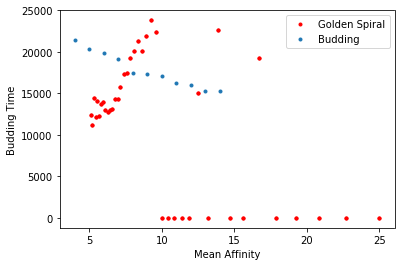

In [26]:
plt.plot(zoo_df['e'],zoo_df['budtime'],'.',label="Golden Spiral",color="red")
plt.plot(budNets['Mean Affinity'],budNets['Mean Budding Time'],'.',label="Budding")
plt.ylabel('Budding Time')
plt.xlabel("Mean Affinity")
plt.legend()
plt.show()

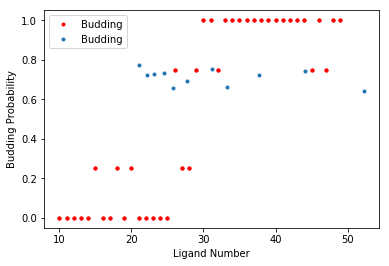

In [27]:
plt.plot(zoo_df['n'],zoo_df['bud_rate'],'.',label="Budding",color="red")
plt.plot(budNets['Ligand Number'],budNets['Budding Rate'],'.',label="Budding")
plt.ylabel('Budding Probability')
plt.xlabel("Ligand Number")
plt.legend()
plt.show()

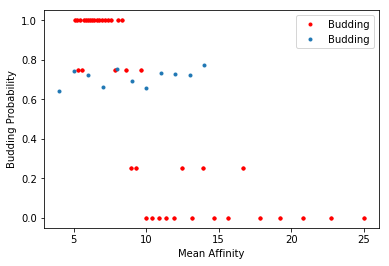

In [28]:
plt.plot(zoo_df['e'],zoo_df['bud_rate'],'.',label="Budding",color="red")
plt.plot(budNets['Mean Affinity'],budNets['Budding Rate'],'.',label="Budding")
plt.ylabel('Budding Probability')
plt.xlabel("Mean Affinity")
plt.legend()
plt.show()

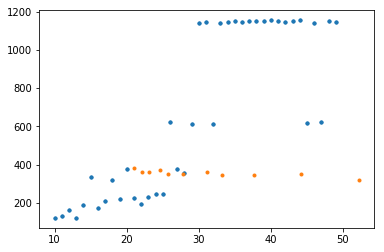

In [29]:
plt.plot(zoo_df['n'],zoo_df['fitness'],'.',label="Budding")
plt.plot(budNets['Ligand Number'],budNets['Fitness'],'.',label="Budding")

In [70]:
# net_df[(net_df['Ligand Number']==23) & (net_df['Mean Affinity']==10)].sort_values("Subgraph Number")

In [71]:

net_df[(net_df['Fitness']==158.750000)&(net_df['Ligand Number']==23) & (net_df['Mean Affinity']==10) ].sort_values(["Subgraph Number","Density"])



,Ligand Number,Mean Affinity,Fitness,Mean Budding Time,Budding Rate,Density,Max Diameter,Mean Diameter,Min Diameter,Min Radius,...,Max Average Shortest Path,Mean Average Shortest Path,Min Average Shortest Path,Subgraph Number,Estrada Coefficient,Pruning,Max SmallWorld,Mean SmallWorld,Min SmallWorld,Clustering Coefficient
2109,23,10.0,158.75,-1.0,0.0,0.162055,4,3.0,2,1,...,1.933333,1.57963,1.333333,3,218.644226,0.3,3.432343,1.97378,1.118906,0.566253


In [75]:
from matplotlib.patches import Rectangle
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from  matplotlib.ticker import FuncFormatter

In [54]:
from matplotlib.patches import Rectangle
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from  matplotlib.ticker import FuncFormatter

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(1,tab20[0][0], N)
vals[:, 1] = np.linspace(1,tab20[0][1], N)
vals[:, 2] = np.linspace(1,tab20[0][2], N)
bluecmp = ListedColormap(vals)

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(tab20[2][0], 1, N)
vals[:, 1] = np.linspace(tab20[2][1], 1, N)
vals[:, 2] = np.linspace(tab20[2][2], 1, N)
orcmp = ListedColormap(vals)

newcolors = np.vstack((orcmp(np.linspace(0, 1, 128)),
                       bluecmp(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

In [150]:
bud_df[bud_df.e<33]

,e,n,bud_number,size,bud_percentage,mean_budtime
0,20.0,4.0,0.0,2880.0,0.000000,-1.000000
1,20.0,5.0,0.0,2880.0,0.000000,-1.000000
2,20.0,6.0,0.0,2880.0,0.000000,-1.000000
3,20.0,7.0,0.0,2880.0,0.000000,-1.000000
4,20.0,8.0,0.0,2880.0,0.000000,-1.000000
5,20.0,9.0,0.0,2880.0,0.000000,-1.000000
6,20.0,11.0,205.0,2880.0,0.017795,22143.536585
7,20.0,12.0,1400.0,2880.0,0.184549,21427.216667
8,20.0,13.0,1806.0,2880.0,0.323003,18296.849022
9,20.0,14.0,2258.0,2880.0,0.511024,16715.756422


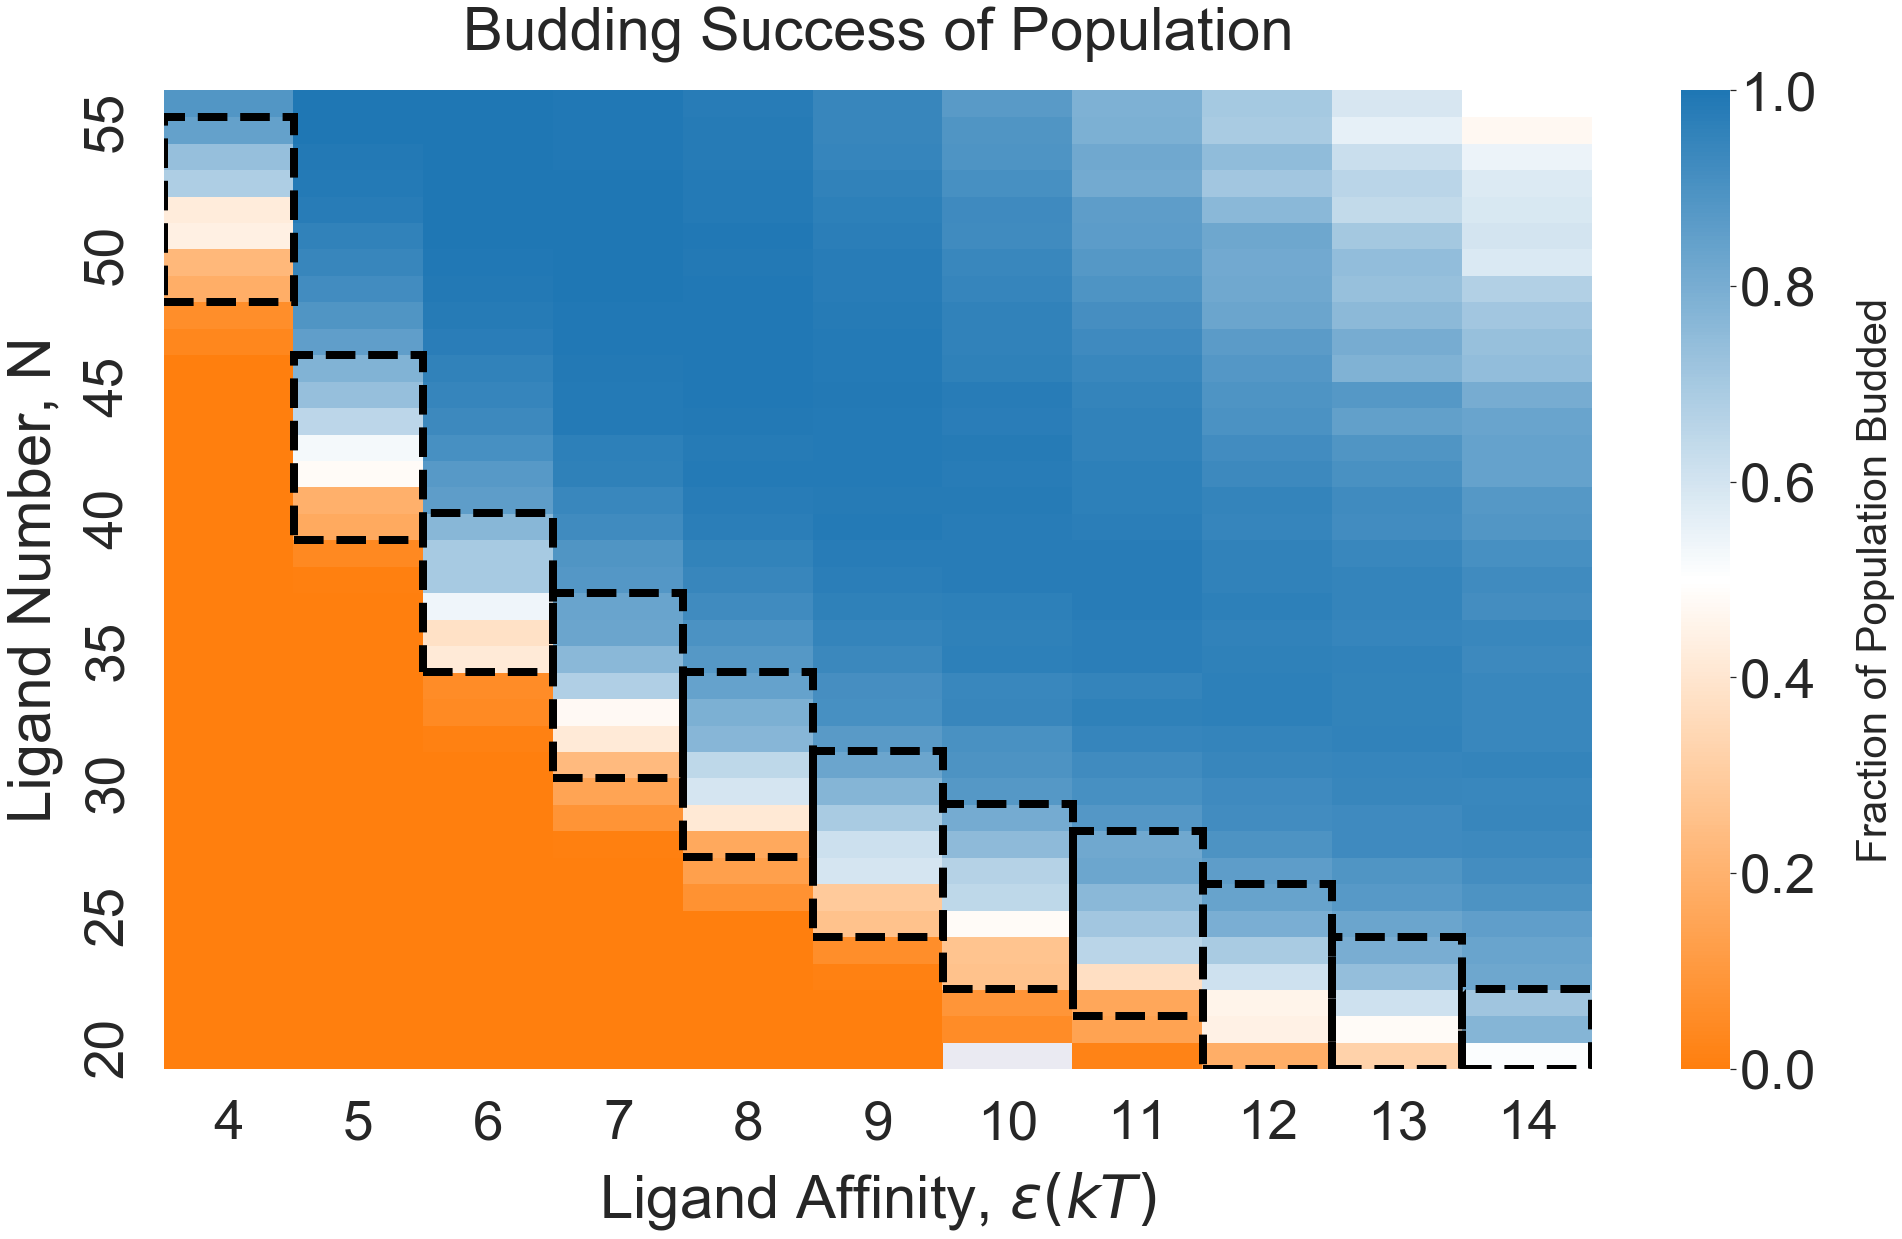

In [292]:
plt.figure(figsize=(32,18))
result = bud_df[bud_df.e<57].pivot(index='e', columns='n', values='bud_percentage')
sns.set(font_scale=5)
ax = sns.heatmap(result,cmap=newcmp,vmin=0, vmax=1.0,cbar_kws={'label': 'Fraction of Population Budded'},xticklabels=[int(i) for i in result],yticklabels=[int(i) if int(i)%5==0 else '' for i in result.index])
plt.title('Budding Success of Population',pad=40)
plt.xlabel("Ligand Affinity, $\epsilon (kT)$", labelpad=20)
plt.ylabel("Ligand Number, N", labelpad=20)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on") 


# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.gca().tick_params(axis='x', which='major', pad=25)
plt.gca().tick_params(axis='y', which='major', pad=25)

plt.gca().figure.axes[-1].yaxis.label.set_size(42)
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Fraction of Population Budded', labelpad=40)

# for label in plt.gca().yaxis.get_ticklabels()[::2]:
#     label.set_visible(False)
    
# ax.yaxis.set_major_locator(ticker.MaxNLocator(10))
# ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=-20,useMathText=False))

dx = 0.; dy = 0.275
offset = matplotlib.transforms.ScaledTranslation(dx, dy, plt.gca().figure.dpi_scale_trans)

for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

boxx = []
boxy = []
boxh = []
for c in criticalRegion:
    bx = c[1]-4
    if not bx in boxx:
        boxx.append(bx)
        boxy.append(c[0]-20)
        boxh.append(1)
    else:
        bind = -1
        for i,b in enumerate(boxx):
            if b == bx:
                bind = i
        boxh[bind]+=1

for i in range(len(boxx)):
    ax.add_patch(Rectangle((boxx[i],boxy[i]), 1, boxh[i], fill=False, edgecolor='black', lw=8,ls='--'))
    
ax.invert_yaxis()
plt.savefig('/Users/joelforster/Projects/Figures/svg/buddingheatmap.svg', format='svg')
plt.show()


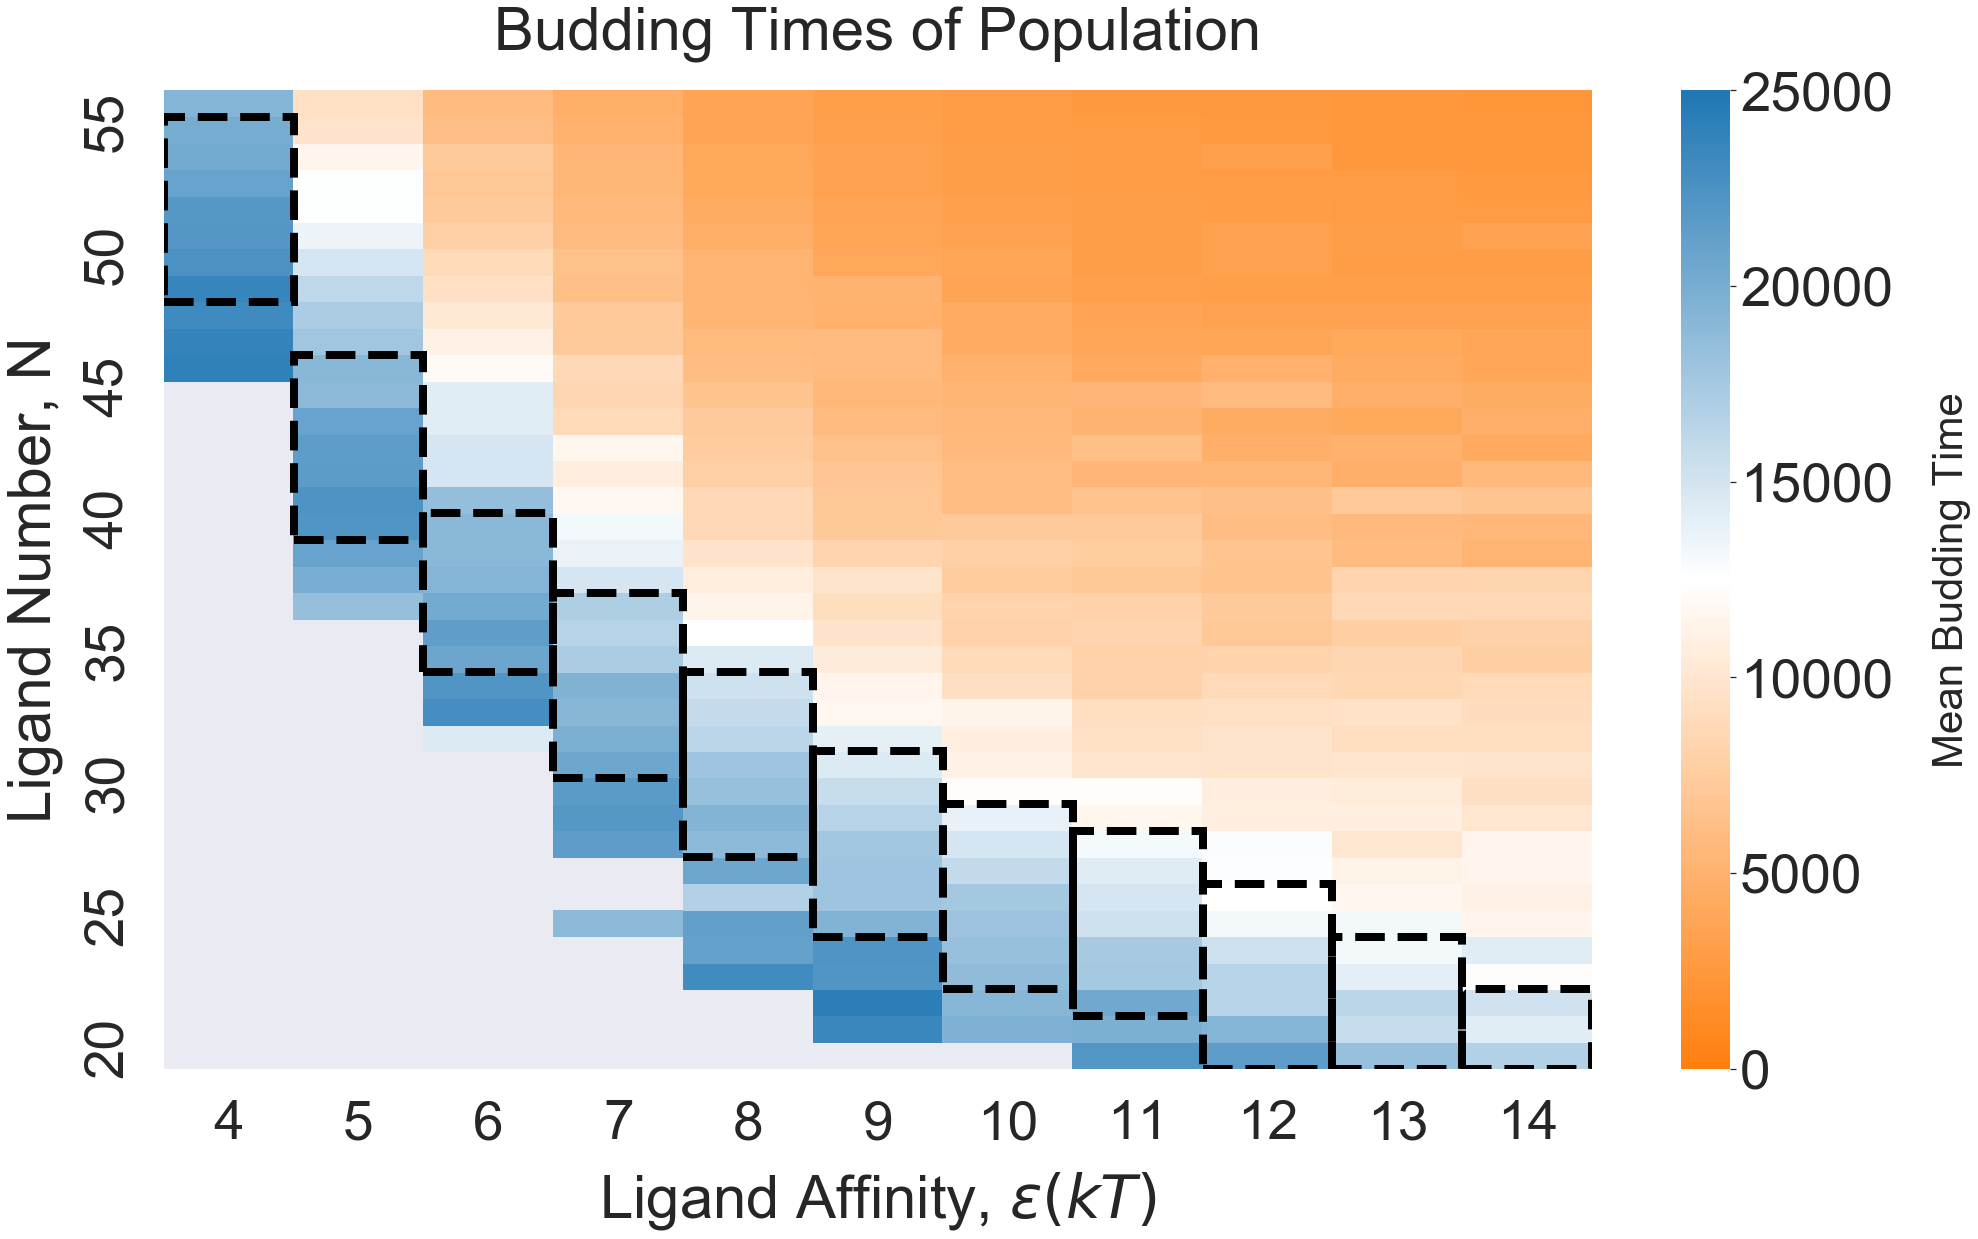

In [356]:
plt.figure(figsize=(32,18))
result = bud_df[(bud_df['mean_budtime']>0) & (bud_df.e<57)].pivot(index='e', columns='n', values='mean_budtime')
sns.set(font_scale=5)
ax = sns.heatmap(result,cmap=newcmp,vmin=0, vmax=25000.0,cbar_kws={'label': 'Mean Budding Time'},xticklabels=[int(i) for i in result],yticklabels=[int(i) if int(i)%5==0 else '' for i in result.index])
plt.title('Budding Times of Population',pad=40)
plt.xlabel("Ligand Affinity, $\epsilon (kT)$", labelpad=20)
plt.ylabel("Ligand Number, N", labelpad=20)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on") 


# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.gca().tick_params(axis='x', which='major', pad=25)
plt.gca().tick_params(axis='y', which='major', pad=25)

plt.gca().figure.axes[-1].yaxis.label.set_size(42)
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Mean Budding Time', labelpad=40)

# for label in plt.gca().yaxis.get_ticklabels()[::2]:
#     label.set_visible(False)
    
# ax.yaxis.set_major_locator(ticker.MaxNLocator(10))
# ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=-20,useMathText=False))

dx = 0.; dy = 0.275
offset = matplotlib.transforms.ScaledTranslation(dx, dy, plt.gca().figure.dpi_scale_trans)

for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

boxx = []
boxy = []
boxh = []
for c in criticalRegion:
    bx = c[1]-4
    if not bx in boxx:
        boxx.append(bx)
        boxy.append(c[0]-20)
        boxh.append(1)
    else:
        bind = -1
        for i,b in enumerate(boxx):
            if b == bx:
                bind = i
        boxh[bind]+=1

for i in range(len(boxx)):
    ax.add_patch(Rectangle((boxx[i],boxy[i]), 1, boxh[i], fill=False, edgecolor='black', lw=8,ls='--'))
    
ax.invert_yaxis()
plt.savefig('/Users/joelforster/Projects/Figures/svg/budtimeheatmap.svg', format='svg')
plt.show()


In [270]:
import matplotlib
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

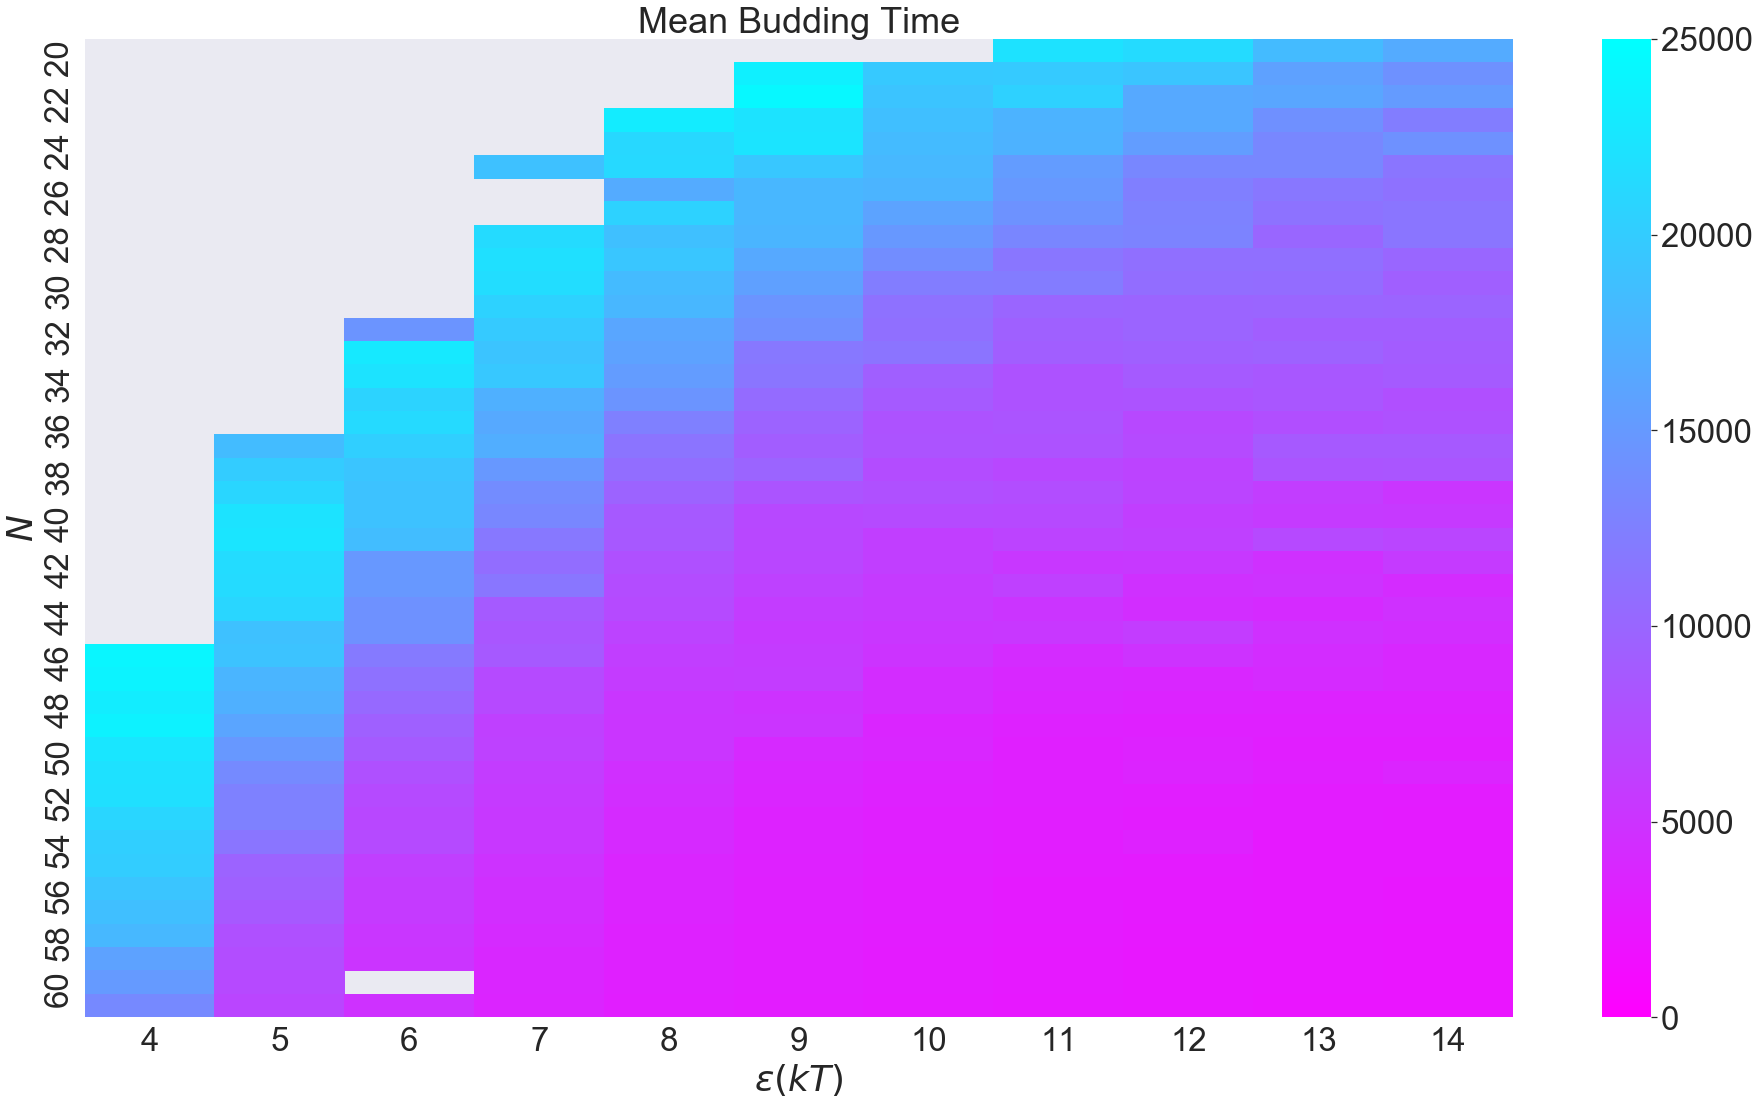

In [58]:
plt.figure(figsize=(16*2,9*2))
result = bud_df[bud_df['mean_budtime']>0].pivot(index='e', columns='n', values='mean_budtime')
sns.set(font_scale=3)
ax = sns.heatmap(result,cmap='cool_r',vmin=0, vmax=25000)
plt.title('Mean Budding Time')
plt.xlabel("$\epsilon (kT)$")
plt.ylabel("$N$")

# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on") 

# for c in criticalRegion:
#     ax.add_patch(Rectangle((c[1]-4,c[0]-20), 1, 1, fill=True, edgecolor='black', lw=3))
    
plt.show()

In [76]:
spec_df = pd.read_csv('/Users/joelforster/Projects/optihedron/opti-spectrum.csv')

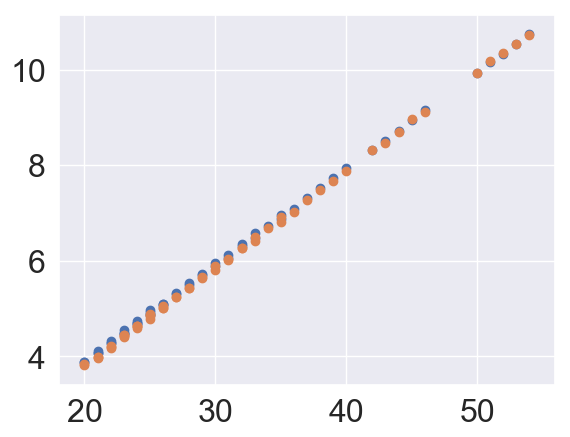

In [78]:
cR = [[20, 13], [20, 14], [21, 12], [21, 13], [21, 14], [22, 12], [22, 13], [22, 14], [23, 10], [23, 11], [23, 12], [23, 13], [24, 10], [24, 11], [24, 12], [24, 13], [25, 9], [25, 10], [25, 11], [25, 12], [26, 9], [26, 10], [26, 11], [27, 9], [27, 10], [28, 9], [28, 10], [29, 8], [29, 9], [30, 8], [30, 9], [31, 7], [31, 8], [32, 7], [32, 8], [33, 7], [33, 8], [34, 7], [35, 6], [35, 7], [36, 6], [37, 6], [38, 6], [39, 6], [40, 6], [42, 5], [43, 5], [44, 5], [45, 5], [46, 5], [50, 4], [51, 4], [52, 4], [53, 4], [54, 4]]
bRadMean = []
nRadMean = []
specAvgs = {}
for c in cR:
    s = spec_df[(spec_df['e']==float(c[-1])) & (spec_df['n']==float(c[0]))]
    bspec = []
    nspec = []
    brad = []
    nrad = []
    for spec in s[s['budtime']>-1]['spectrum'].values.tolist():
        speclist = [float(eig) for eig in spec[1:len(spec)-1].split(',')]
        bspec.append(speclist)
        brad.append(max(speclist))
    for spec in s[s['budtime']<0]['spectrum'].values.tolist():
        speclist = [float(eig) for eig in spec[1:len(spec)-1].split(',')]
        nspec.append(speclist)
        nrad.append(max(speclist))
    if not c[0] in specAvgs:
        specAvgs[c[0]]={}
    specAvgs[c[0]][c[-1]] = {}
    specAvgs[c[0]][c[-1]]['b'] = np.mean(bspec, axis=0, dtype=None, out=None, keepdims=False)
    specAvgs[c[0]][c[-1]]['n'] = np.mean(nspec, axis=0, dtype=None, out=None, keepdims=False)
#     sns.distplot(nrad,bins=np.linspace(min(nrad),max(nrad),40),kde=False,norm_hist=True)
#     sns.distplot(brad,bins=np.linspace(min(brad),max(brad),40),kde=False,norm_hist=True)
    bRadMean.append([c[0],c[1],np.mean(brad)])
    nRadMean.append([c[0],c[1],np.mean(nrad)])
plt.scatter([i[0] for i in nRadMean],[i[2] for i in nRadMean])
plt.scatter([i[0] for i in bRadMean],[i[2] for i in bRadMean])

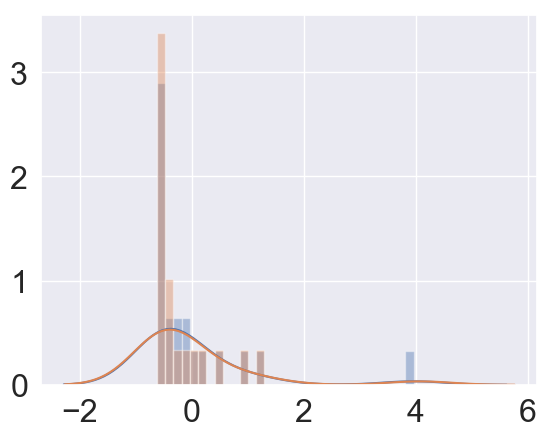

In [79]:
se = 12
sn = 21

sns.distplot(specAvgs[sn][se]['b'],bins=np.linspace(np.min(specAvgs[sn][se]['b']),np.max(specAvgs[sn][se]['b']),32),norm_hist=True)
sns.distplot(specAvgs[sn][se]['n'],bins=np.linspace(np.min(specAvgs[sn][se]['b']),np.max(specAvgs[sn][se]['b']),32),norm_hist=True)

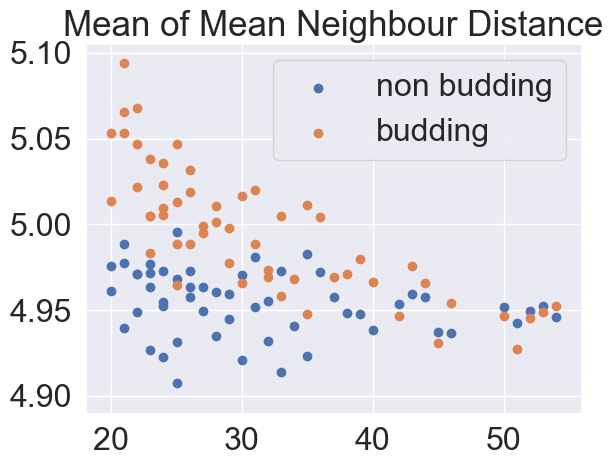

In [80]:
nDistMean = []
bDistMean = []
nDistMin = []
bDistMin = []
nDistMax = []
bDistMax = []
for c in cR:
    s = spec_df[(spec_df['e']==float(c[-1])) & (spec_df['n']==float(c[0]))]
    bdist = []
    ndist = []
    for dist in s[s['budtime']>-1]['mean_dist'].values.tolist():
        fdist = float(dist)
        bdist.append(fdist)
    for dist in s[s['budtime']<0]['mean_dist'].values.tolist():
        fdist = float(dist)
        ndist.append(fdist)
    nDistMean.append([c[0],c[1],1.0/np.mean(ndist)])
    bDistMean.append([c[0],c[1],1.0/np.mean(bdist)])
    nDistMin.append([c[0],c[1],1.0/np.min(ndist)])
    bDistMin.append([c[0],c[1],1.0/np.min(bdist)])
    nDistMax.append([c[0],c[1],1.0/np.max(ndist)])
    bDistMax.append([c[0],c[1],1.0/np.max(bdist)])

# sns.distplot(ndist,bins=np.linspace(min(ndist),max(ndist),40),kde=False,norm_hist=True)
# sns.distplot(bdist,bins=np.linspace(min(bdist),max(bdist),40),kde=False,norm_hist=True)

plt.scatter([i[0] for i in nDistMean],[i[2] for i in nDistMean],label='non budding')
plt.scatter([i[0] for i in bDistMean],[i[2] for i in bDistMean],label='budding')
plt.title('Mean of Mean Neighbour Distance')
plt.legend()
plt.show()

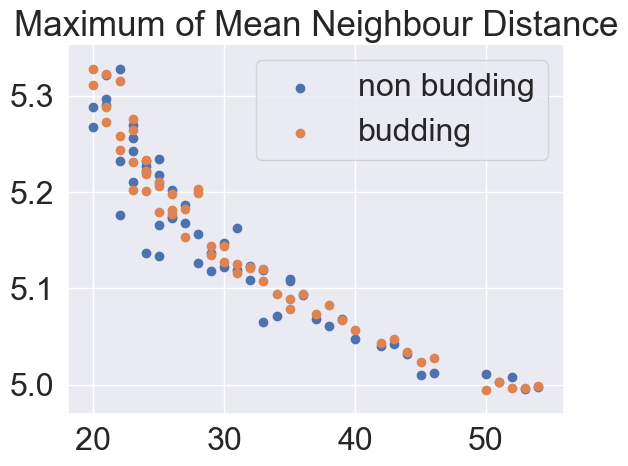

In [81]:
plt.scatter([i[0] for i in nDistMin],[i[2] for i in nDistMin],label='non budding')
plt.scatter([i[0] for i in bDistMin],[i[2] for i in bDistMin],label='budding')
plt.title('Maximum of Mean Neighbour Distance')
plt.legend()
plt.show()

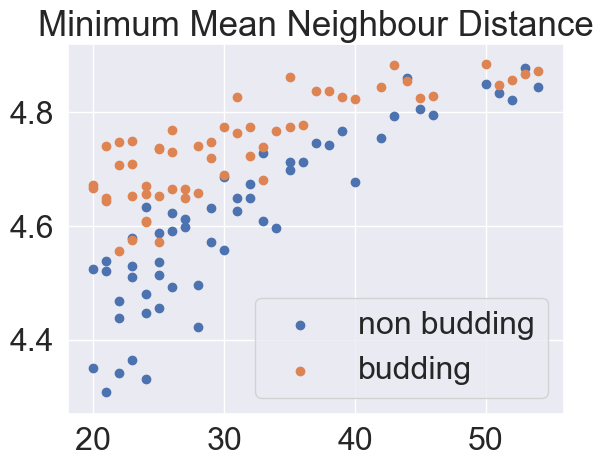

In [82]:
plt.scatter([i[0] for i in nDistMax],[i[2] for i in nDistMax],label='non budding')
plt.scatter([i[0] for i in bDistMax],[i[2] for i in bDistMax],label='budding')
plt.title('Minimum Mean Neighbour Distance')
plt.legend()
plt.show()

In [66]:
min(net_df['Estrada Coefficient'])

48.197985417299996

In [326]:
bud_df.columns

Index([u'e', u'n', u'bud_number', u'size', u'bud_percentage', u'mean_budtime'], dtype='object')

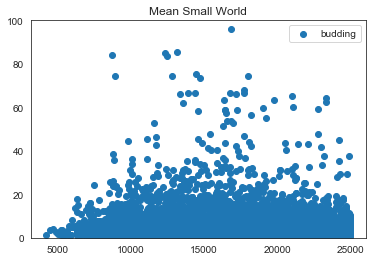

In [54]:
plt.scatter(net_df[net_df["Mean Budding Time"] > 0]['Mean Budding Time'].values,net_df[net_df["Mean Budding Time"] > 0]['Mean SmallWorld'].values,label='budding')
plt.title('Mean Small World')
plt.ylim(0,100)
plt.legend()
plt.show()

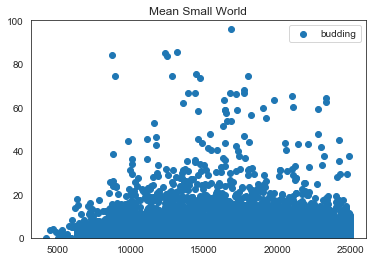

In [55]:
plt.scatter(net_df[net_df["Mean Budding Time"] > 0]['Mean Budding Time'].values,net_df[net_df["Mean Budding Time"] > 0]['Min SmallWorld'].values,label='budding')
plt.title('Mean Small World')
plt.ylim(0,100)
plt.legend()
plt.show()

/Users/joelforster/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


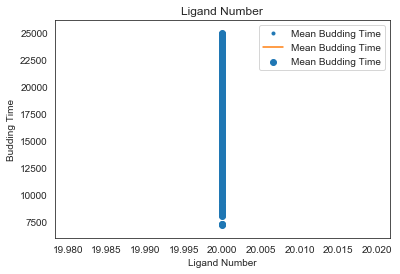

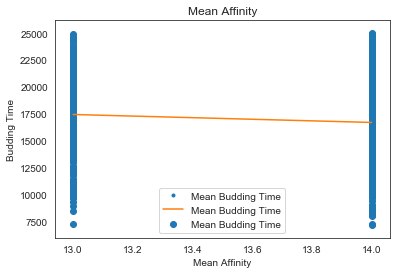

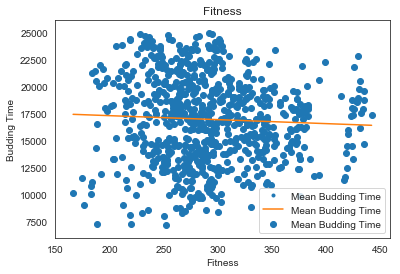

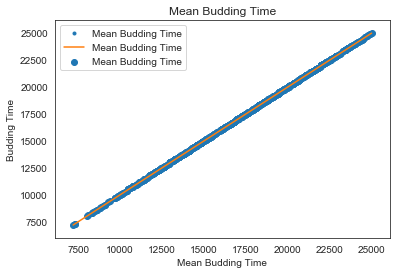

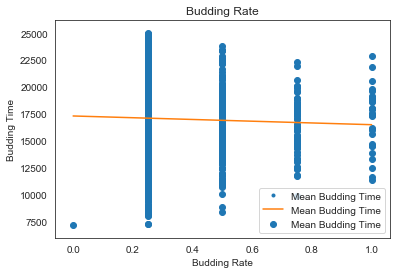

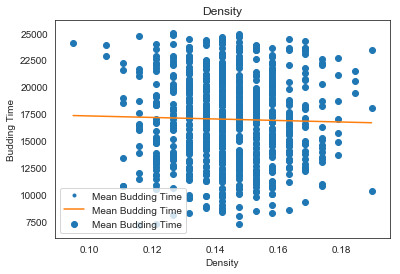

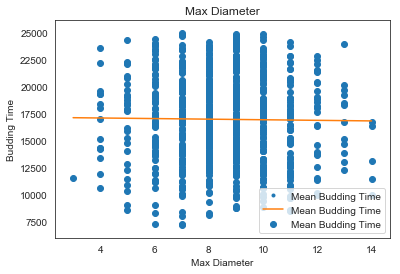

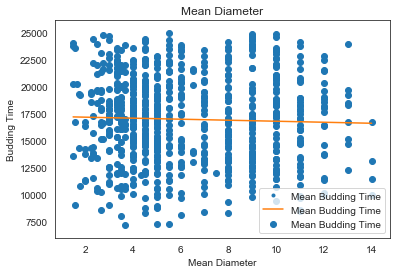

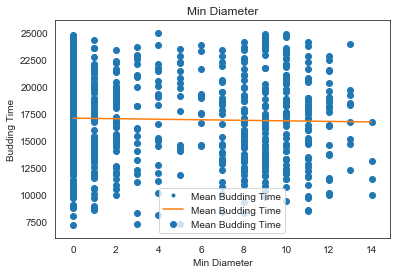

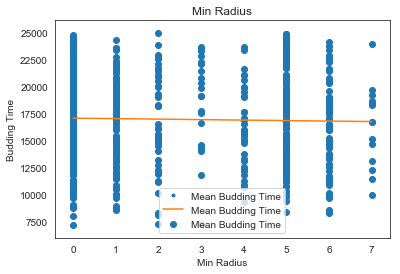

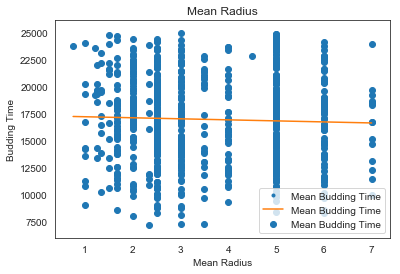

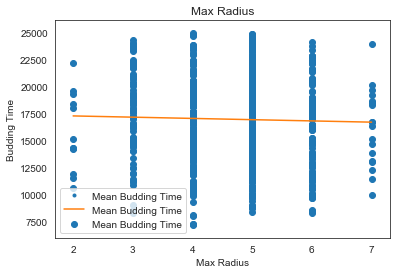

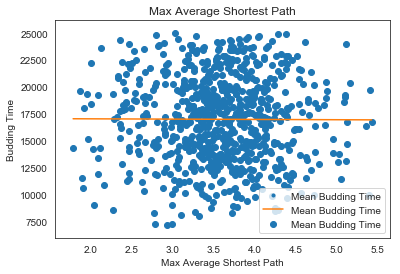

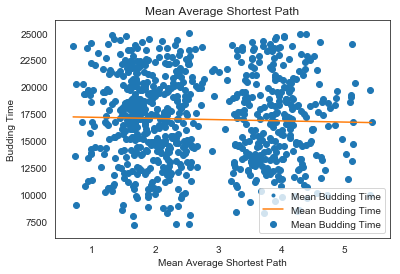

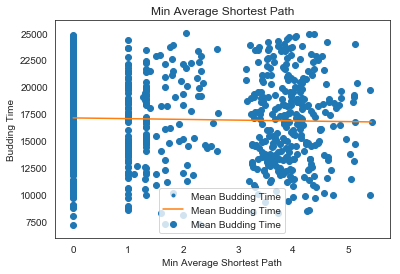

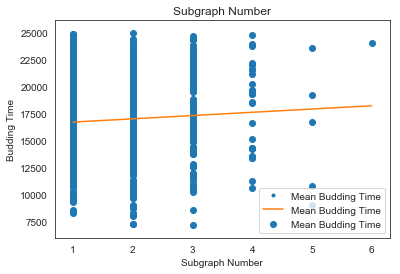

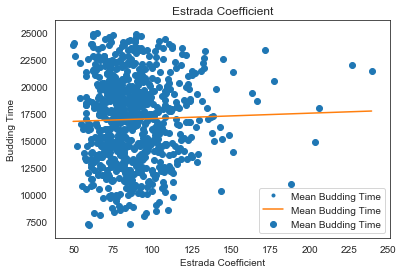

/Users/joelforster/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


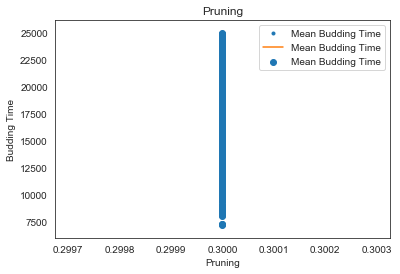

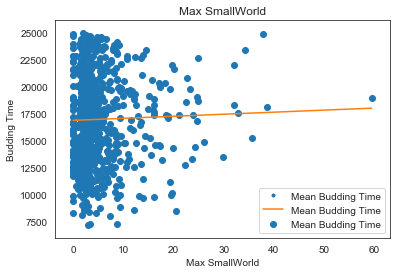

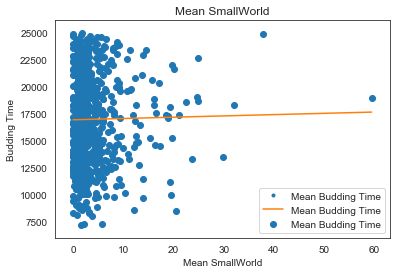

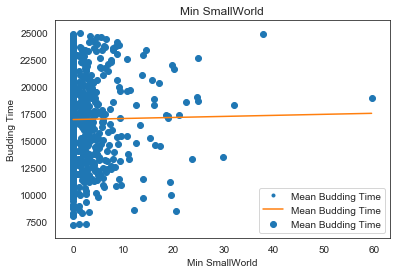

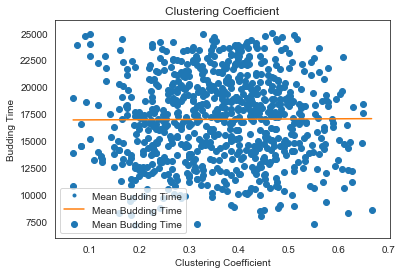

In [106]:
for c in criticalNets.columns:
    d = criticalNets[(criticalNets["Mean Budding Time"] > 0) & (criticalNets["Ligand Number"] == 20)].sort_values(by=[c])
    y = d['Mean Budding Time']
    x = d[c]
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    z = np.polyfit(x, y, 1)
    f = np.poly1d(z)
    plt.plot(x,y,'.', x, f(x))
    plt.scatter(x,y)
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel("Budding Time")
    
    plt.legend()
    plt.show()

In [ ]:
import nanoparticle
from tools import analysistools as atools

In [144]:
def randomParticleNetwork(n,pruning=0.3):
    a=np.ones(72)
    a[n:72]=0
    np.random.shuffle(a)
    phenome=nanoparticle.CoveredNanoParticlePhenome(a,1,0,10,10)
    particle = phenome.particle
    net = atools.buildLigandNetwork(particle.ligands)
    pN = atools.pruneNetwork(net,pruning)
    return pN
    

In [167]:
def particleSummary(pN):
    density = nx.density(pN)
    avgC = nx.average_clustering(pN)
    graphs = list(nx.connected_component_subgraphs(pN))
    dS = []
    rS = []
    sPS = []
    SWs = []

    for g in graphs:
        d = nx.diameter(g)
        r = nx.radius(g)
        sp = nx.average_shortest_path_length(g)
        dS.append(d)
        rS.append(r)
        sPS.append(sp)
        SWs.append(atools.smallWorldNess(g))

    maxDiameter = np.max(dS)
    avgDiameter = np.mean(dS)
    minDiameter = np.min(dS)
    minRadius = np.min(rS)
    avgRadius = np.mean(rS)
    maxRadius = np.max(rS)
    maxASp = np.max(sPS)
    avgASp = np.mean(sPS)
    minASp = np.min(sPS)
    maxSW = np.max(SWs)
    avgSW = np.mean(SWs)
    minSW = np.min(SWs)
    subgraphs = len(graphs)
    estrada = nx.estrada_index(pN)
    l = [density,
        maxDiameter,
          avgDiameter,
          minDiameter,
          minRadius,
          avgRadius,
          maxRadius,
          maxASp,
          avgASp,
          minASp,
          subgraphs,
          estrada,
          maxSW,
          avgSW,
          minSW,
          avgC]
    return l

In [184]:
nLigs = 52
nets=[]
nNets=len(criticalNets[(criticalNets['Mean Budding Time'] > 0.0)&(criticalNets['Ligand Number']==float(nLigs))])
for i in range(nNets):
    nets.append(randomParticleNetwork(nLigs,pruning=0.3))
    

rnddata = []
for n in nets:
    rnddata.append(particleSummary(n))

rnd_df=pd.DataFrame(columns=[
            "Density",
            "Max Diameter",
            "Mean Diameter",
            "Min Diameter",
            "Min Radius",
            "Mean Radius",
            "Max Radius",
            "Max Average Shortest Path",
            "Mean Average Shortest Path",
            "Min Average Shortest Path",
            "Subgraph Number",
            "Estrada Coefficient",
            "Max SmallWorld",
            "Mean SmallWorld",
            "Min SmallWorld",
            "Clustering Coefficient"],data=rnddata)

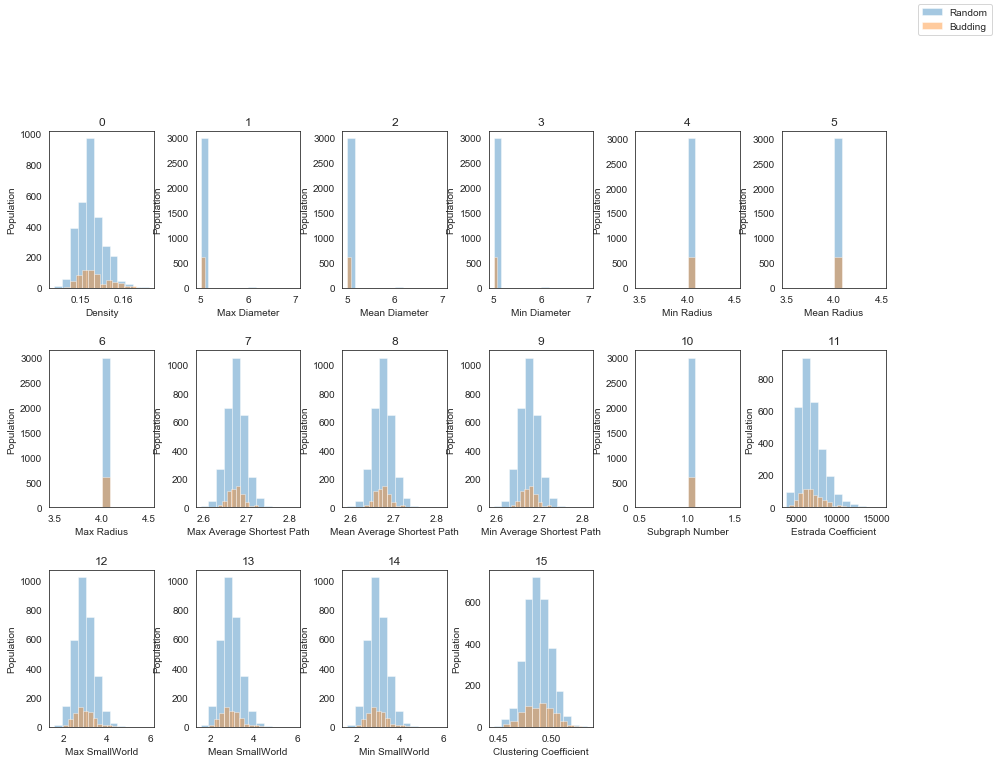

In [182]:


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
startI = 20
# for i in range(startI,startI+16):
#     ax = plt.subplot(4, 4, i-startI+1)
#     r = buildHistPlot(c,i)
#     ax = sns.distplot(r[0],label="Budding",bins=25,kde=False)
#     ax = sns.distplot(r[1],label="Non Budding",bins=25,kde=False)
#     ax.set_xlabel(c)
#     ax.set_ylabel("Population")
#     ax.set_title(i)

for i,c in enumerate(rnd_df.columns):
    ax = plt.subplot(4, 6, i+1)
    r = buildHistPlot(c,nLigs)
    ax = sns.distplot(rnd_df[c].values,label="Random",bins=12,kde=False)
    ax = sns.distplot(r[0],label="Budding",bins=12,kde=False)
#     ax = sns.distplot(r[1],label="Non Budding",bins=12,kde=False)
    ax.set_xlabel(c)
    ax.set_ylabel("Population")
    ax.set_title(i)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

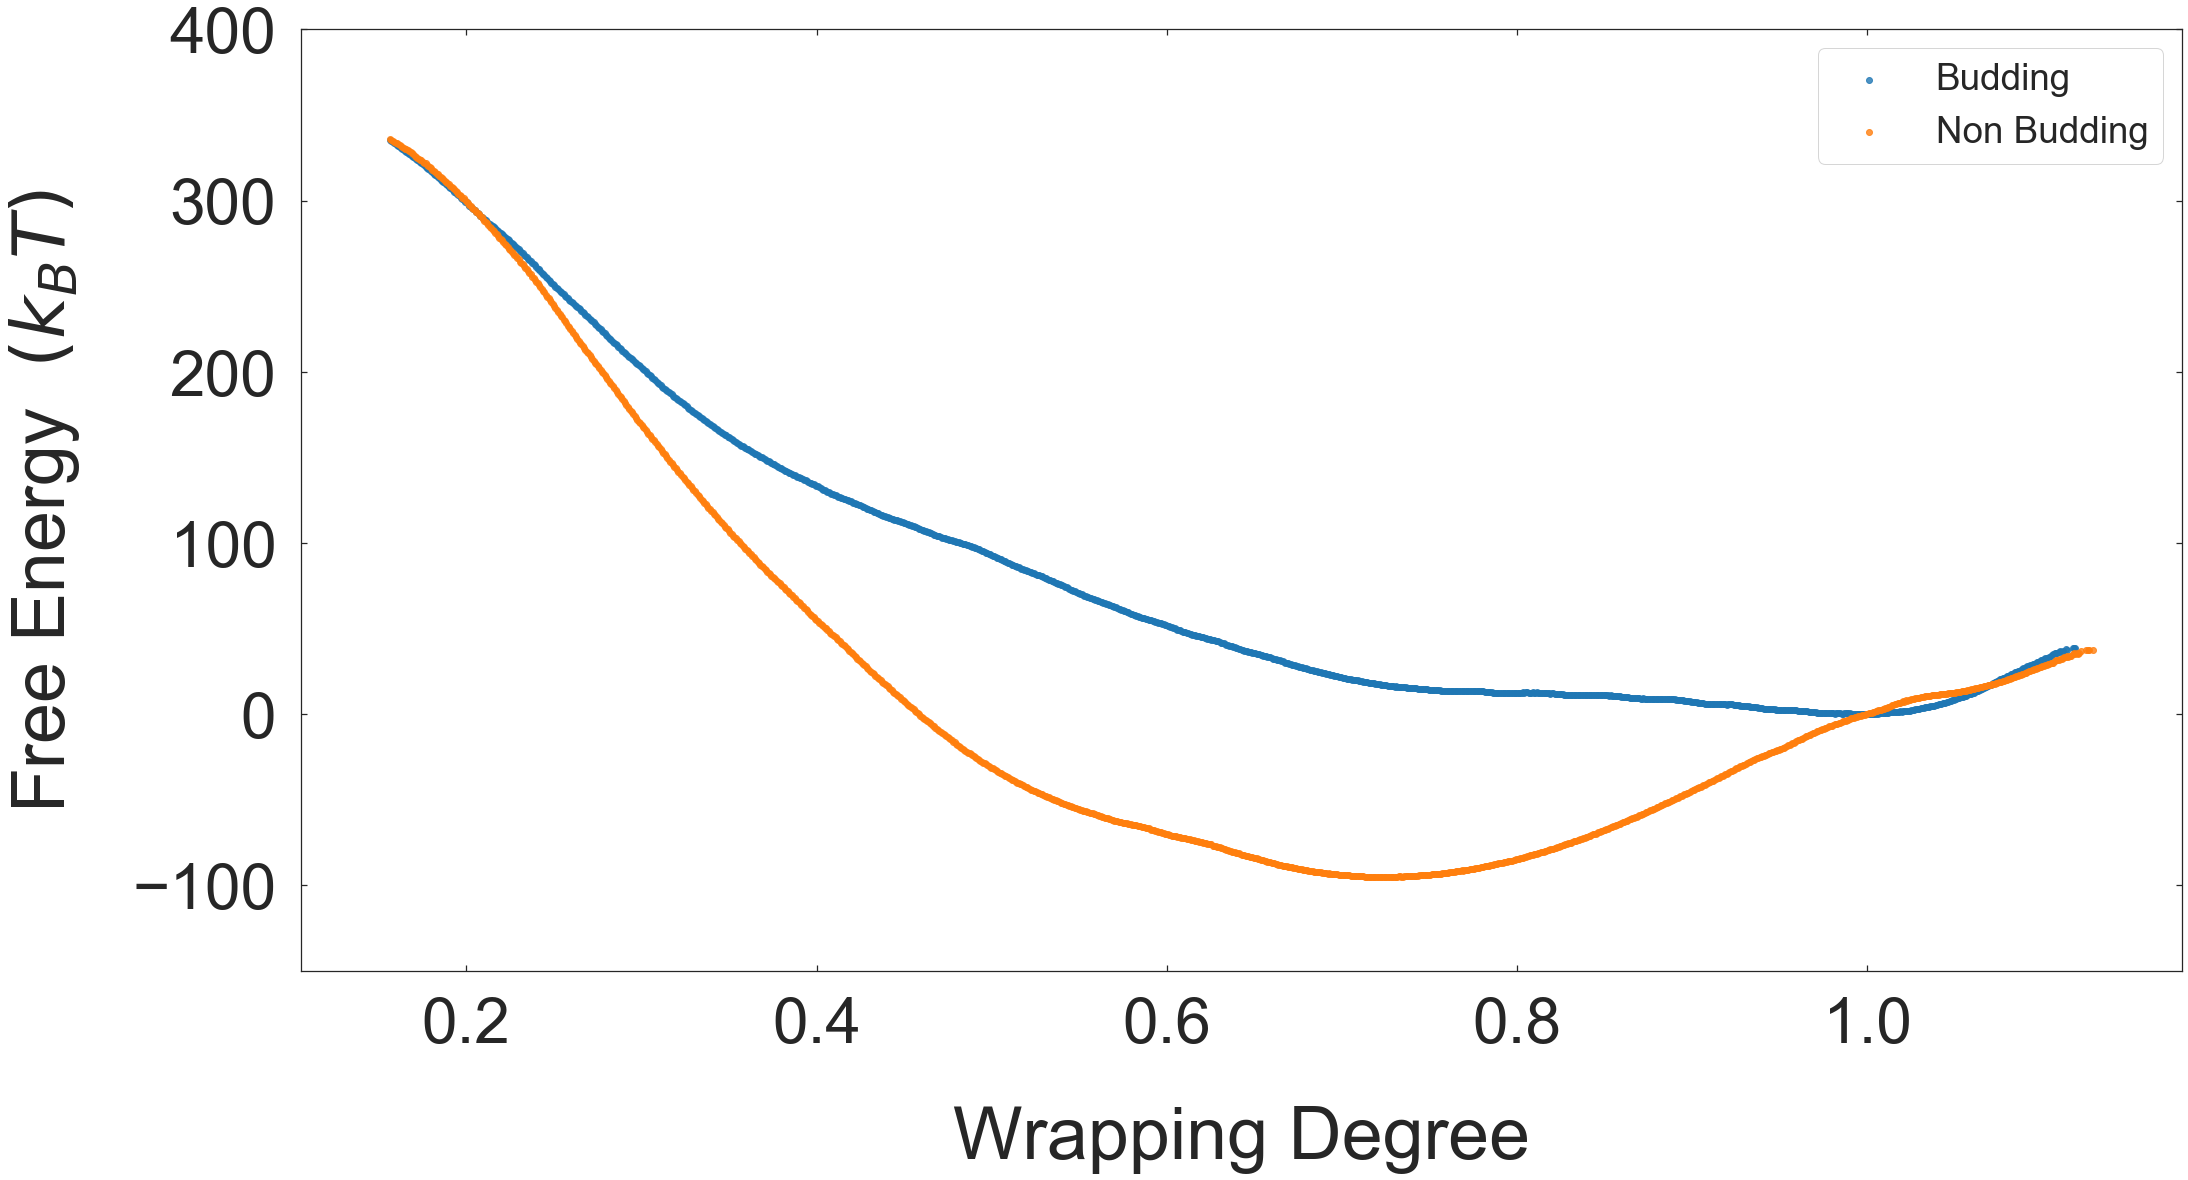

In [383]:
budcolor=(31.0/255.0,119.0/255.0,180.0/255.0)
nonbudcolor=(255.0/255.0,127.0/255.0,14.0/255.0)

bpmfdf = pd.read_csv('/Users/joelforster/Projects/optidb/bud_pmf.csv',index_col=None,header=None,names=['Degree','Energy'])
nbpmfdf = pd.read_csv('/Users/joelforster/Projects/optidb/nonbud_pmf.csv',index_col=None,header=None,names=['Degree','Energy'])
bminEnergy = bpmfdf[bpmfdf['Energy'] == np.min(bpmfdf['Energy'])]
nbminEnergy = nbpmfdf[nbpmfdf['Degree'] == bminEnergy['Degree'].values[-1]]
prefac = 1.0/bminEnergy['Degree'].values[-1]
bpmfdf['Wrapping Degree'] = bpmfdf['Degree']*prefac
nbpmfdf['Wrapping Degree'] = nbpmfdf['Degree']*prefac

bpmfdf['Free Energy'] = bpmfdf['Energy']-bminEnergy['Energy'].values[-1]
nbpmfdf['Free Energy'] = nbpmfdf['Energy']-nbminEnergy['Energy'].values[-1]

factor=2.0
padding=0.025

labelSize=32
tickSize=32

sns.set_style("white")
plt.figure(figsize=(16.0*factor,9*factor))
ax = plt.subplot(111)


sns.regplot(y='Free Energy', x="Wrapping Degree", data=bpmfdf[bpmfdf['Energy']!=0],fit_reg=False,color=budcolor,label='Budding')
sns.regplot(y='Free Energy', x="Wrapping Degree", data=nbpmfdf[nbpmfdf['Energy']!=0],fit_reg=False,color=nonbudcolor,label='Non Budding')

plt.ylabel('Free Energy  $(k_BT)$',fontsize=labelSize*factor*1.15,labelpad=25*factor)
plt.xlabel('Wrapping Degree',fontsize=labelSize*factor*1.15,labelpad=25*factor)
    
plt.xticks(fontsize=tickSize*factor)
plt.yticks(fontsize=tickSize*factor)
ax.spines["top"].set_visible(True)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(True)    
ax.spines["left"].set_visible(True) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

axes = plt.gca()

axes.set_ylim([-150,400])

#     ax.set_ylim(yr0,yr1)
plt.tick_params(axis="both", which="both", bottom="on", top="on",    
                labelbottom="on", left="on", right="on", labelleft="on",direction='in')  

plt.gca().tick_params(axis='x', which='major', pad=25)
plt.gca().tick_params(axis='y', which='major', pad=25)


#     plt.gca().grid(True)
plt.legend(loc='best',fontsize=32*1.15)
plt.tight_layout()
plt.savefig('/Users/joelforster/Projects/Figures/eps/pmf.eps', format='eps', dpi=1000)
plt.savefig('/Users/joelforster/Projects/Figures/png/pmf.png')
plt.savefig('/Users/joelforster/Projects/Figures/svg/pmf.svg', format='svg')

plt.show()